In [1]:
%run ~/.python/init.ipynb

In [2]:
%cd /home/vadmas/dev/projects/active/alpha_path

/home/vadmas/dev/projects/active/alpha_path


In [3]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [4]:
def trace_plot(chain):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.plot(np.arange(chain.shape[0]),chain)
    plt.title('Trace Plot for $\\mu$')

    plt.subplot(122)
    plt.hist(chain,orientation='horizontal',bins=30)
    plt.title('Histogram for $\\mu$')

    plt.tight_layout()
    plt.show()

In [5]:
from src.paths import alpha_average
from src.ais import Gaussian1D, find_average_batch, run_ais, run_alpha_average_loops
from src.utils import pmap
from itertools import product

In [6]:
proposal = Gaussian1D(-4.0, 3)
target   = Gaussian1D(4.0, 1)

In [46]:
beta_vec = np.linspace(0, 1, 11)
alpha_vec = np.linspace(-1, 1, 21)

In [47]:
def plot_ridge(data, alpha_vec):
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(data, 
                      row="label", 
                      hue="label", 
                      sharey='row',
                      col='alpha', aspect=15, height=.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x",
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, "x")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.set(xticks=[-10, -5, 0, 5, 10])
    cols = [r"$\alpha = {:.02}$".format(alpha) for alpha in alpha_vec]

    for ax, col in zip(g.axes[0], cols):
        ax.set_title(col, fontsize=26)
    
    g.despine(bottom=True, left=True)
    filename = f"./plots/ridge_{alpha_vec[0]}.pdf"
    g.fig.savefig(filename, bbox_inches='tight')
    print('saved to {}'.format(filename))

    return g

In [48]:
def run_hmc(beta, alpha):
    no_samples = 30000
    samples = alpha_average(proposal, target, beta, alpha).sample(no_samples)
    df = pd.Series(samples).to_frame()
    df['beta'] = beta
    df['alpha'] =  alpha
    return df

In [49]:
res = pd.concat(pmap(lambda x: run_hmc(x[0], x[1]), product(beta_vec, alpha_vec), notebook=True), axis=0)

In [13]:
res.to_pickle("alpha_run.pkl")

In [17]:
res['label'] = res.beta.apply(lambda x: r"$\beta=${:.02}".format(x))
res  = res.rename_column(0,'x')

In [36]:
tmp = res[res.alpha == a]

/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.8.pdf


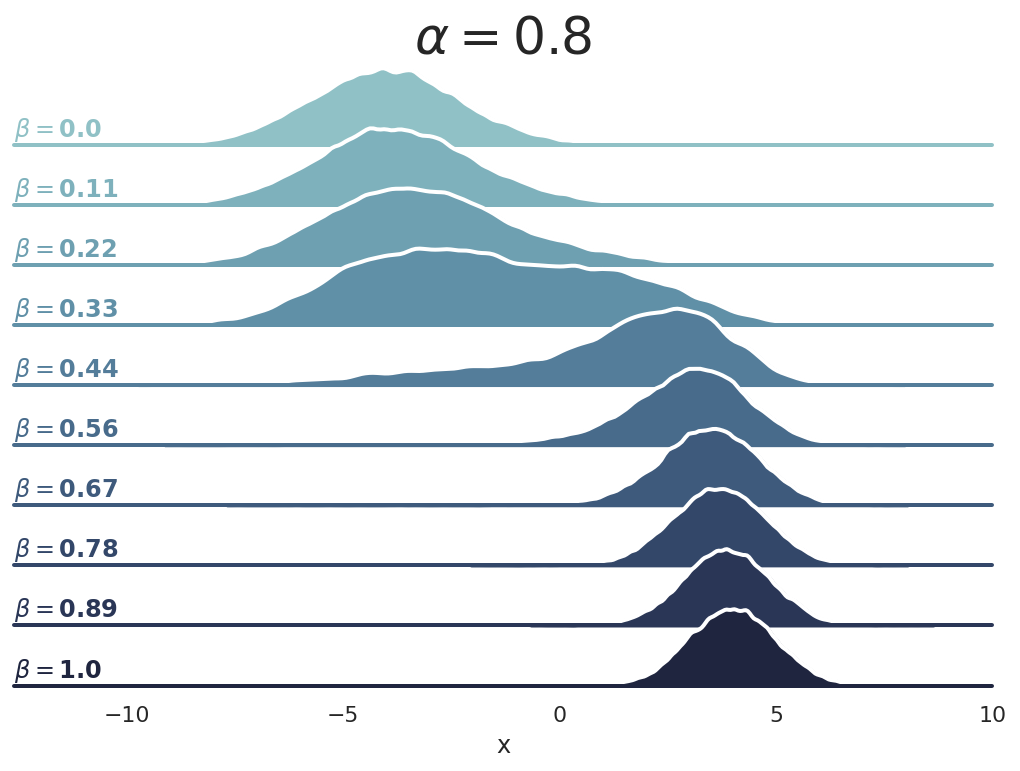

In [43]:
plot_ridge(res[res.alpha == 0.8], [0.8])

/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-1.0.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.9.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.8.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.7.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.6.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.5.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.3999999999999999.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.29999999999999993.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.19999999999999996.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_-0.09999999999999998.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.0.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.10000000000000009.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.20000000000000018.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.30000000000000004.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.40000000000000013.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.5.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.6000000000000001.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.7000000000000002.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.8.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


saved to ./plots/ridge_0.9000000000000001.pdf


/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: 

saved to ./plots/ridge_1.0.pdf


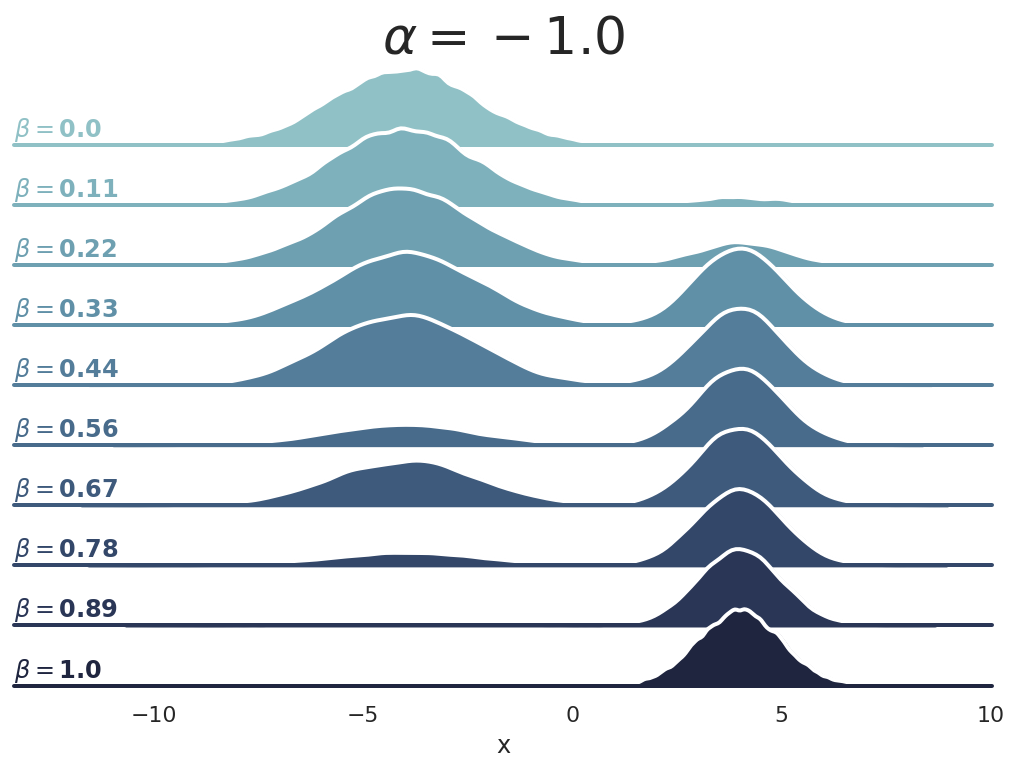

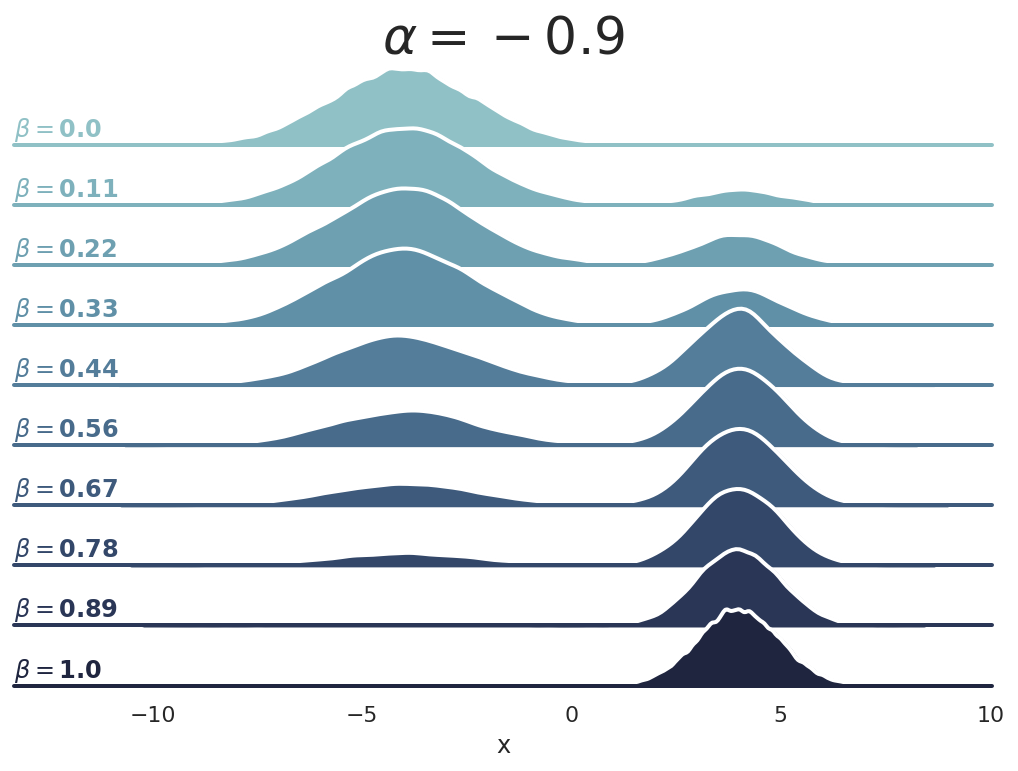

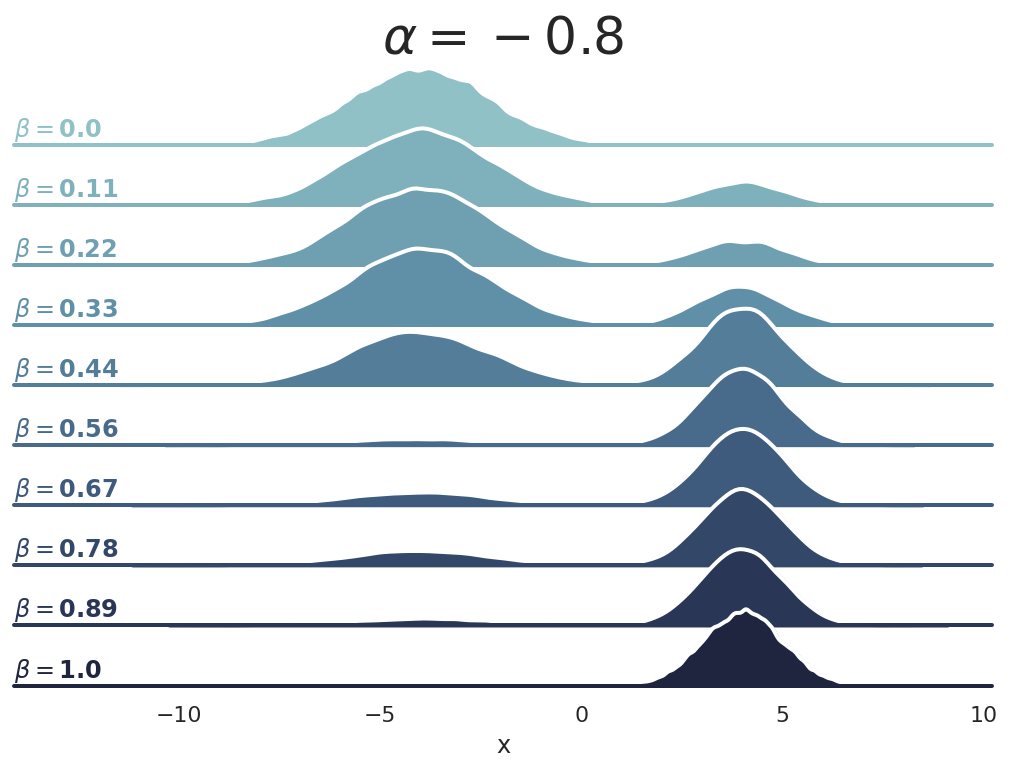

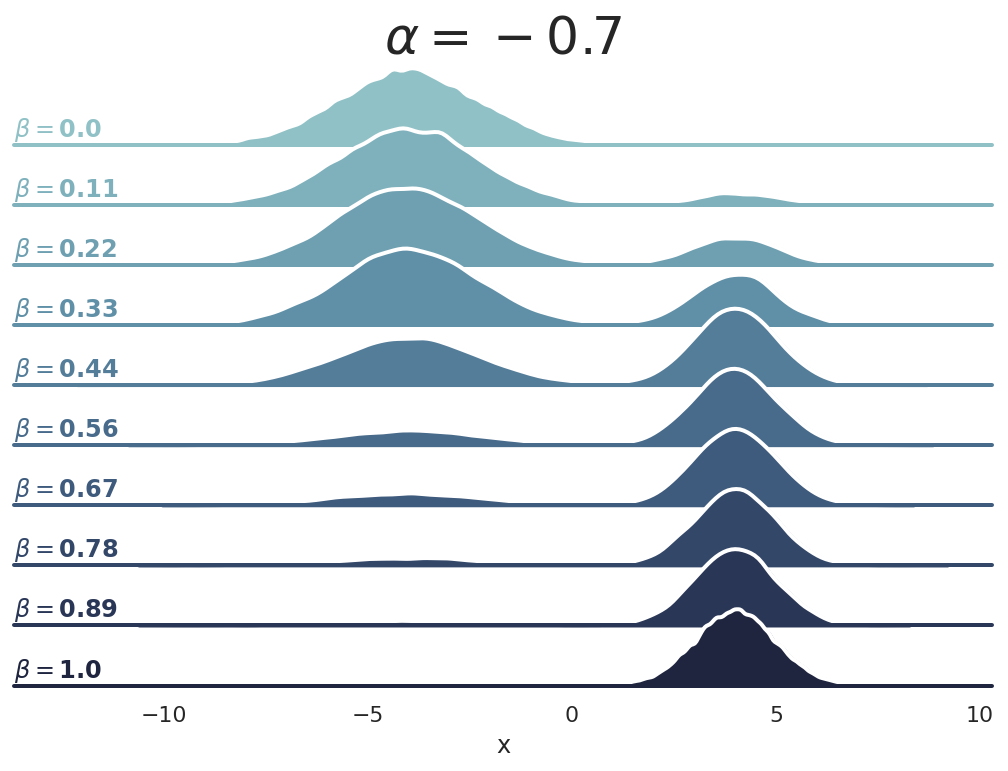

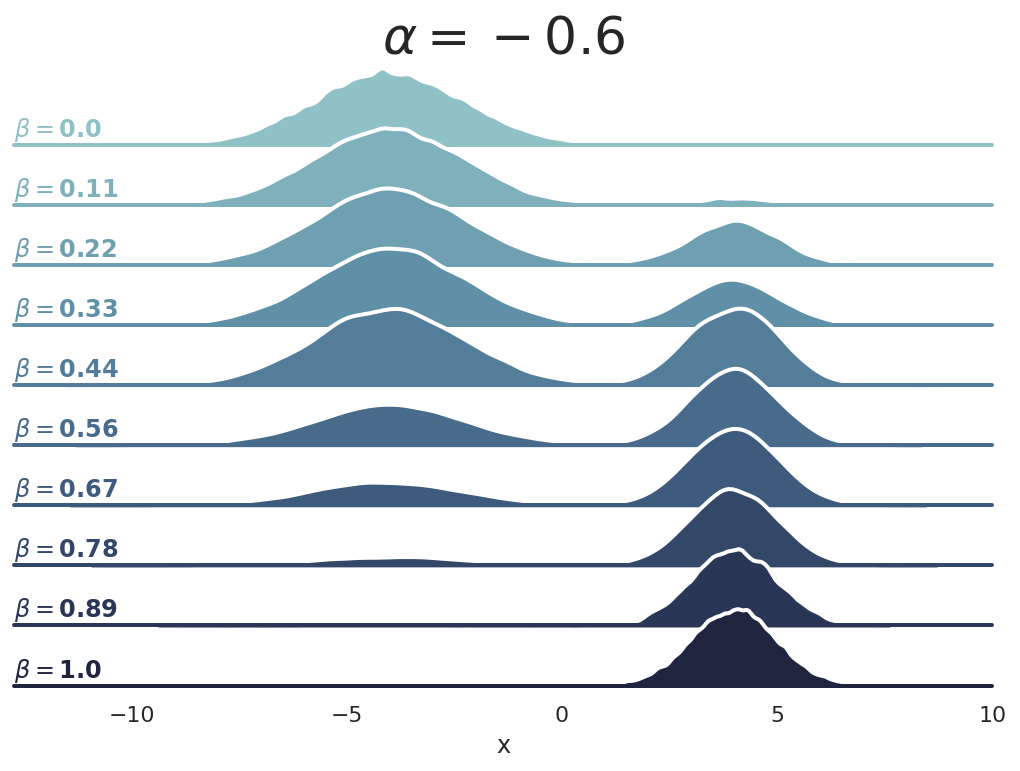

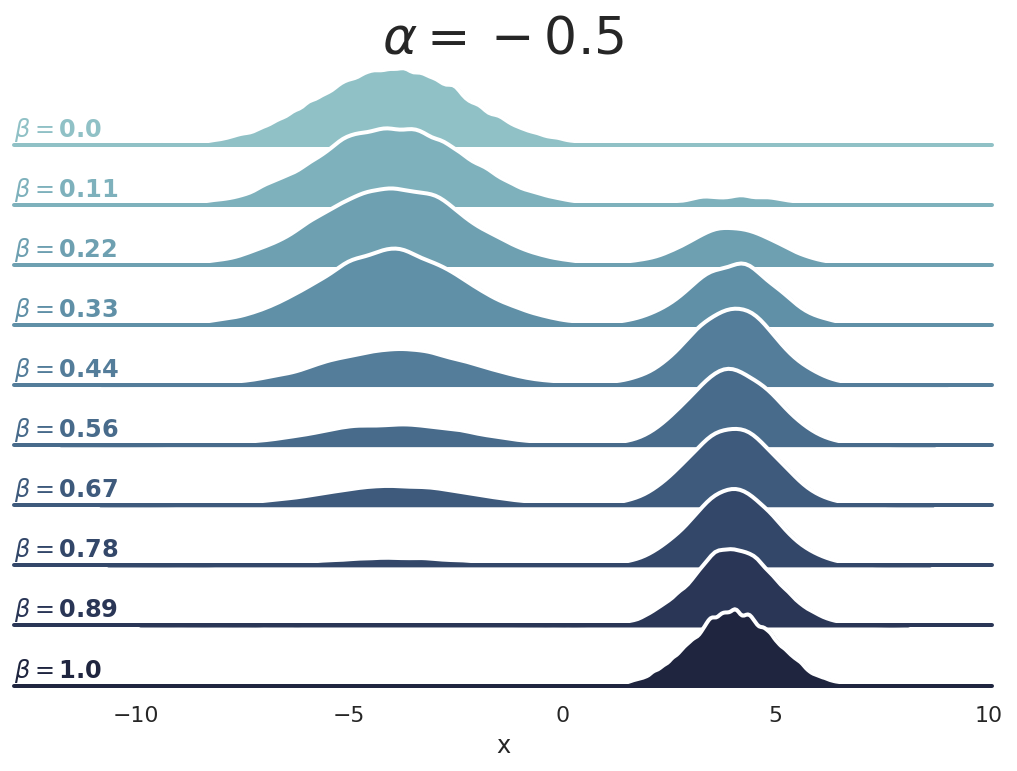

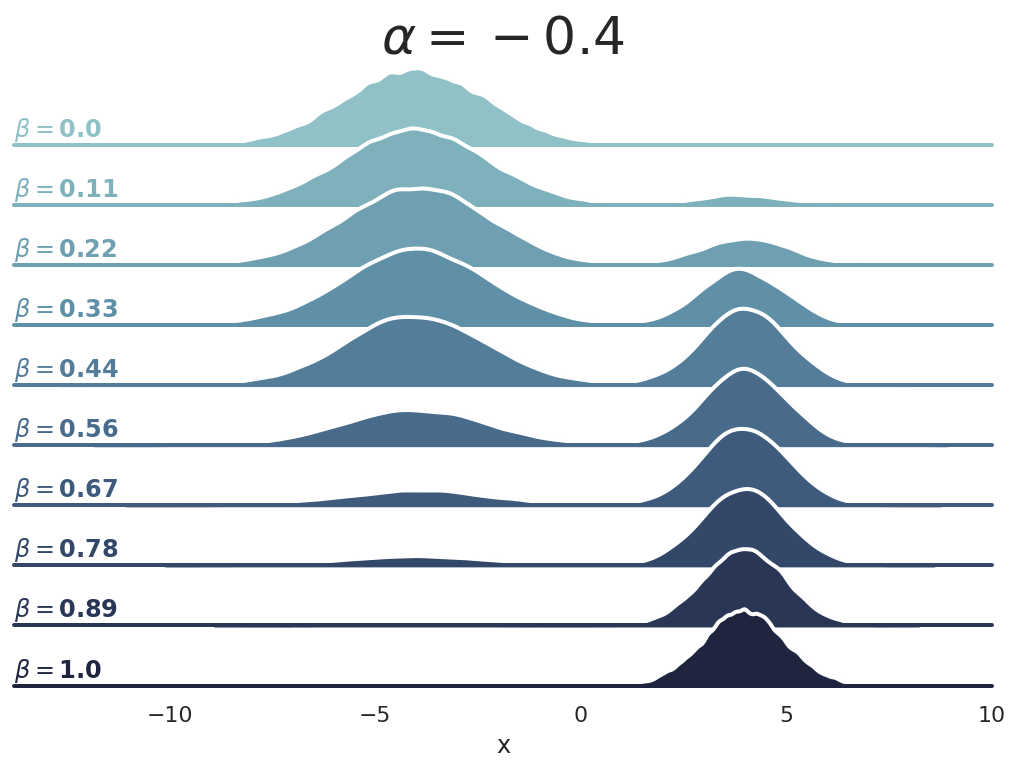

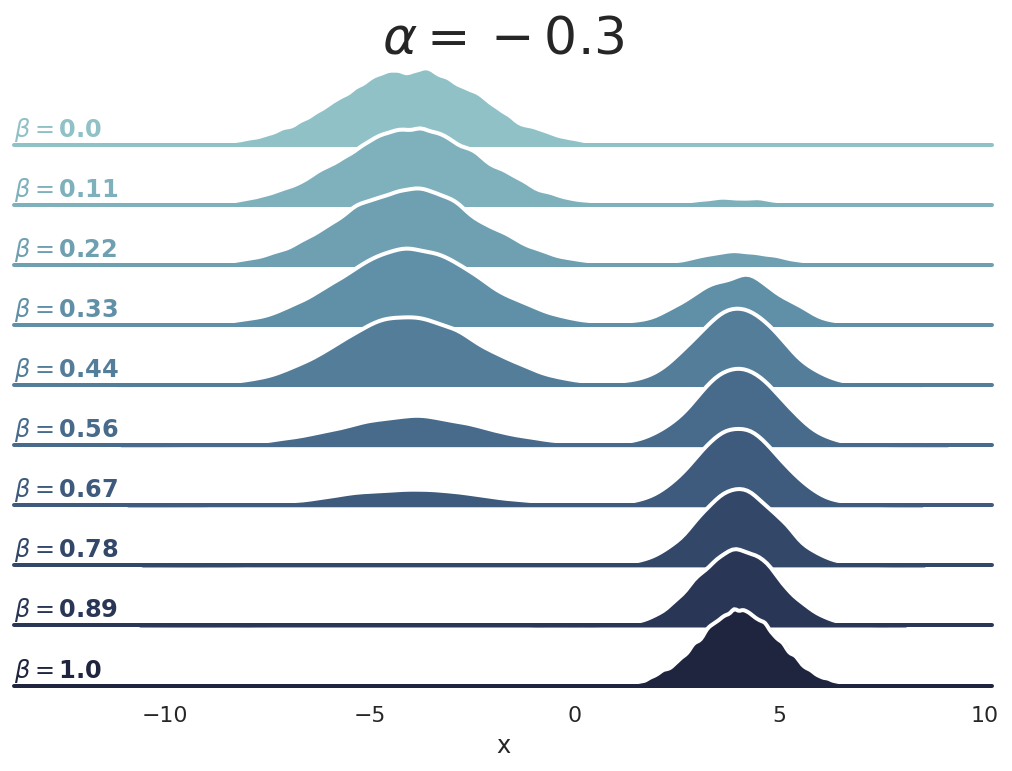

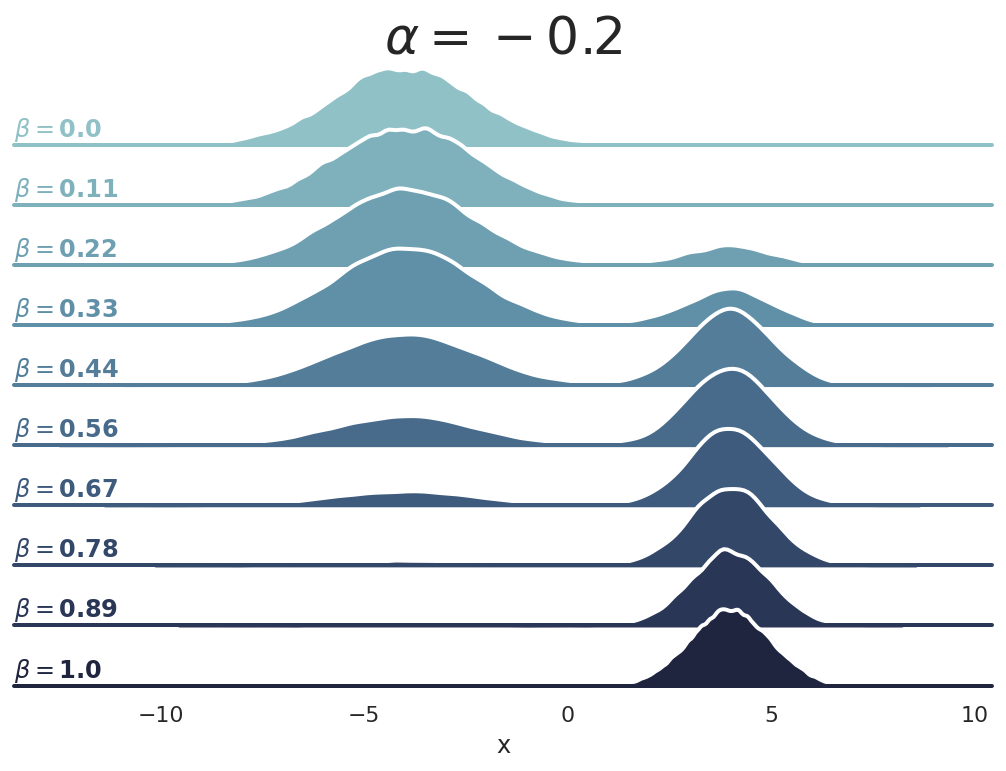

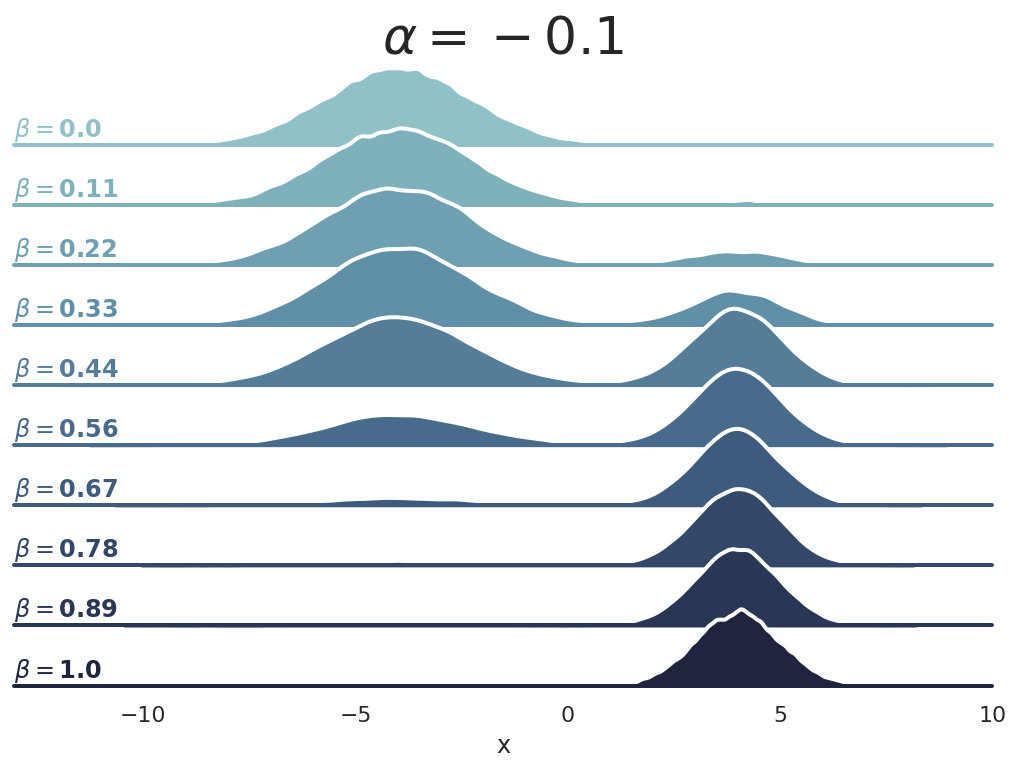

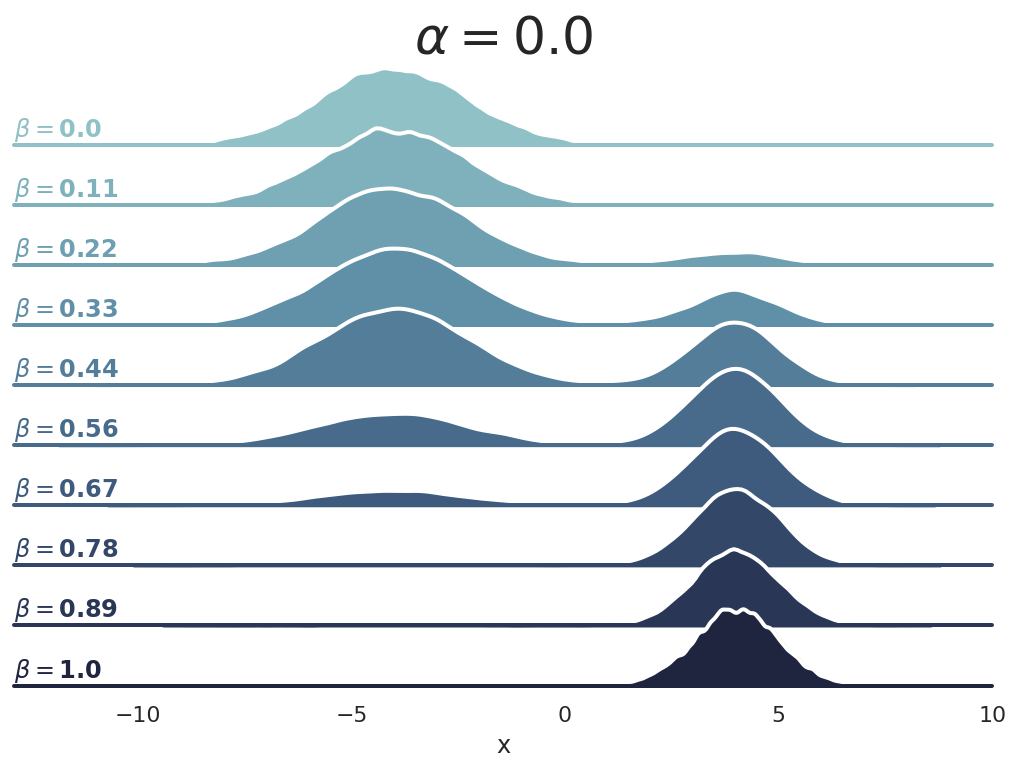

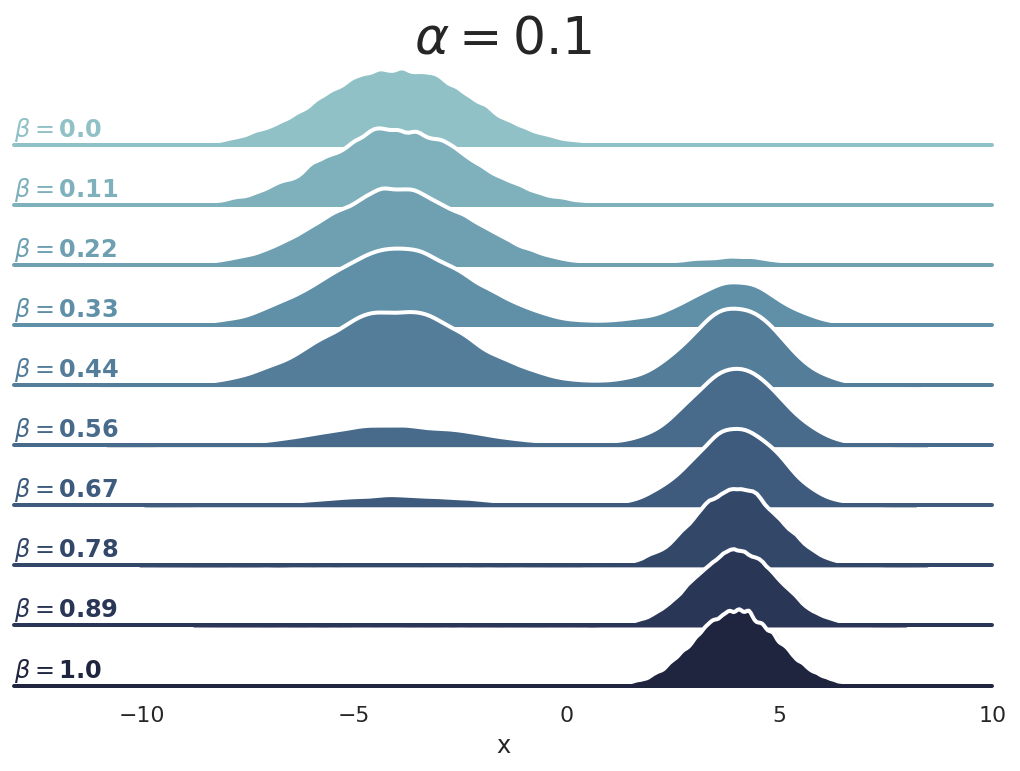

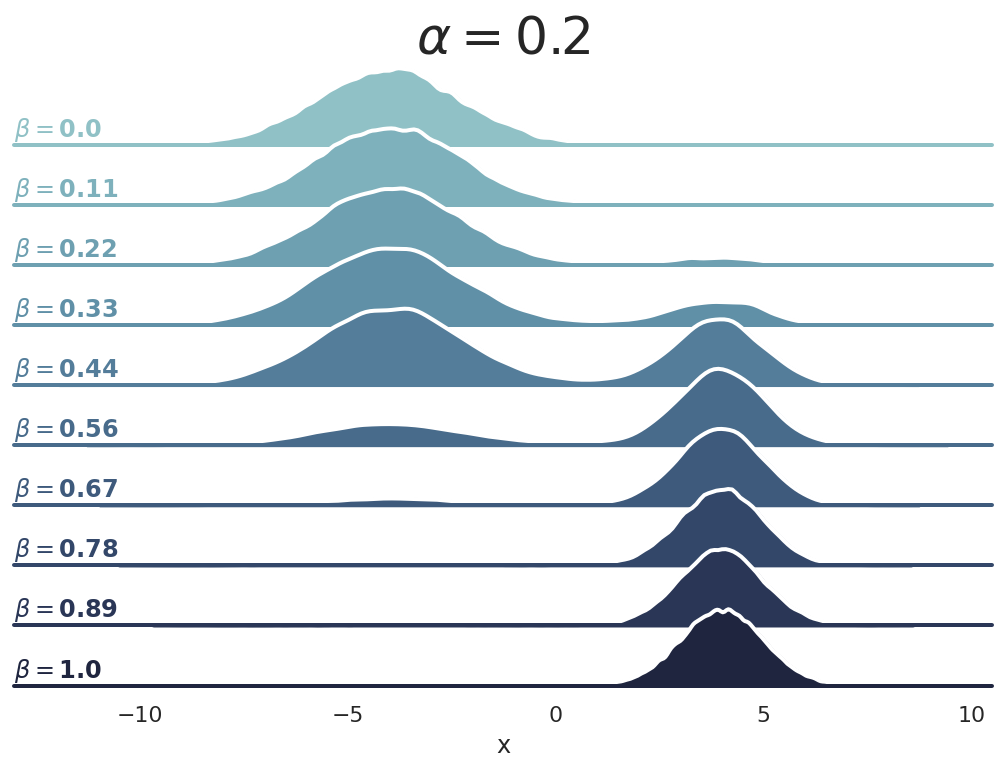

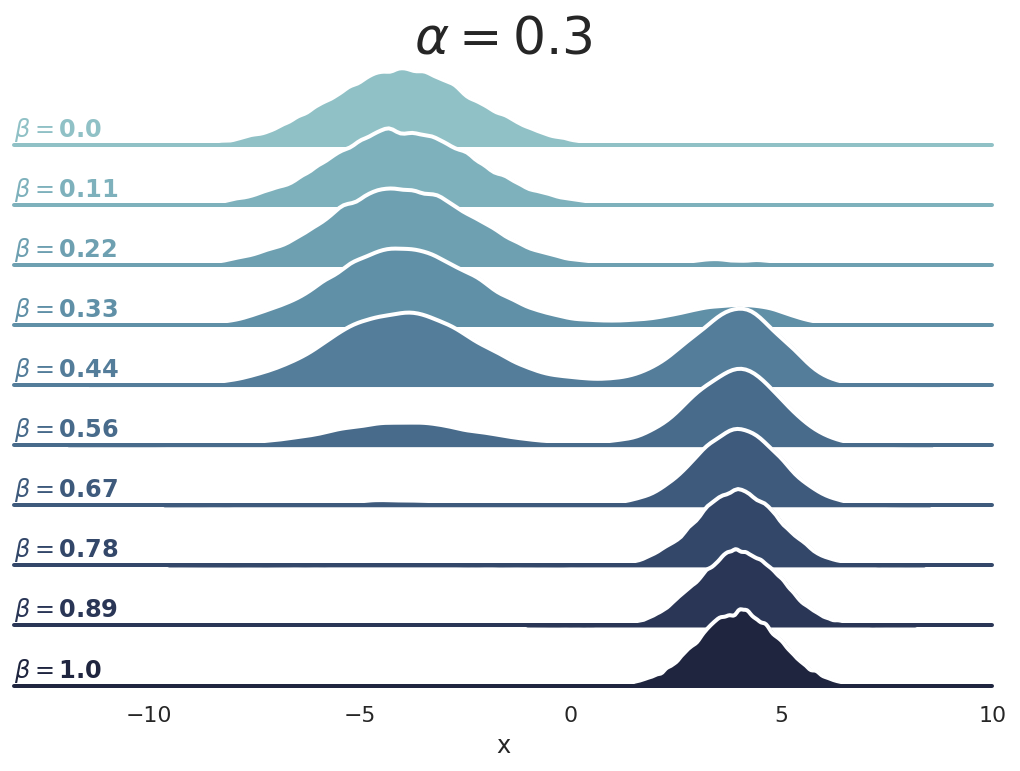

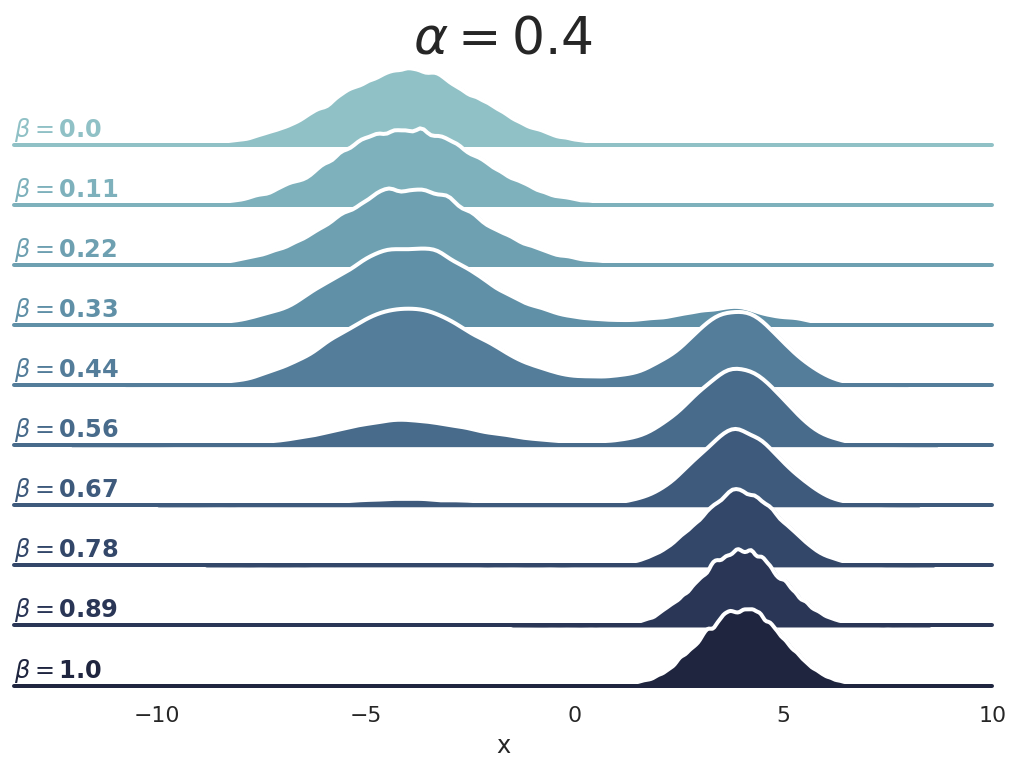

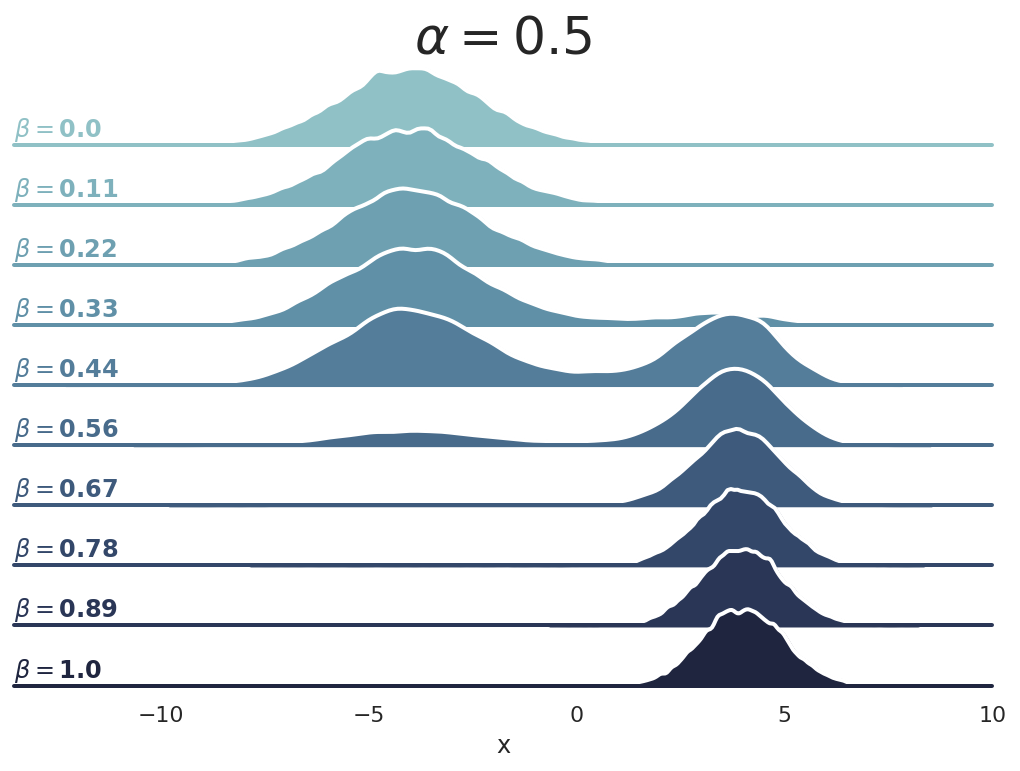

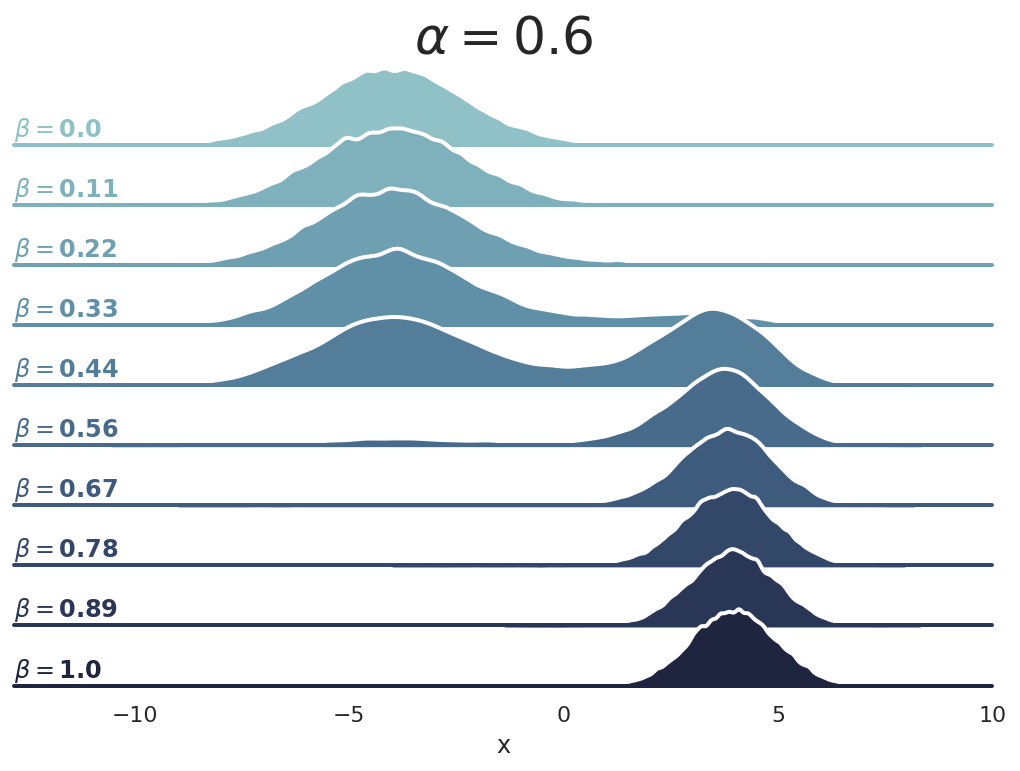

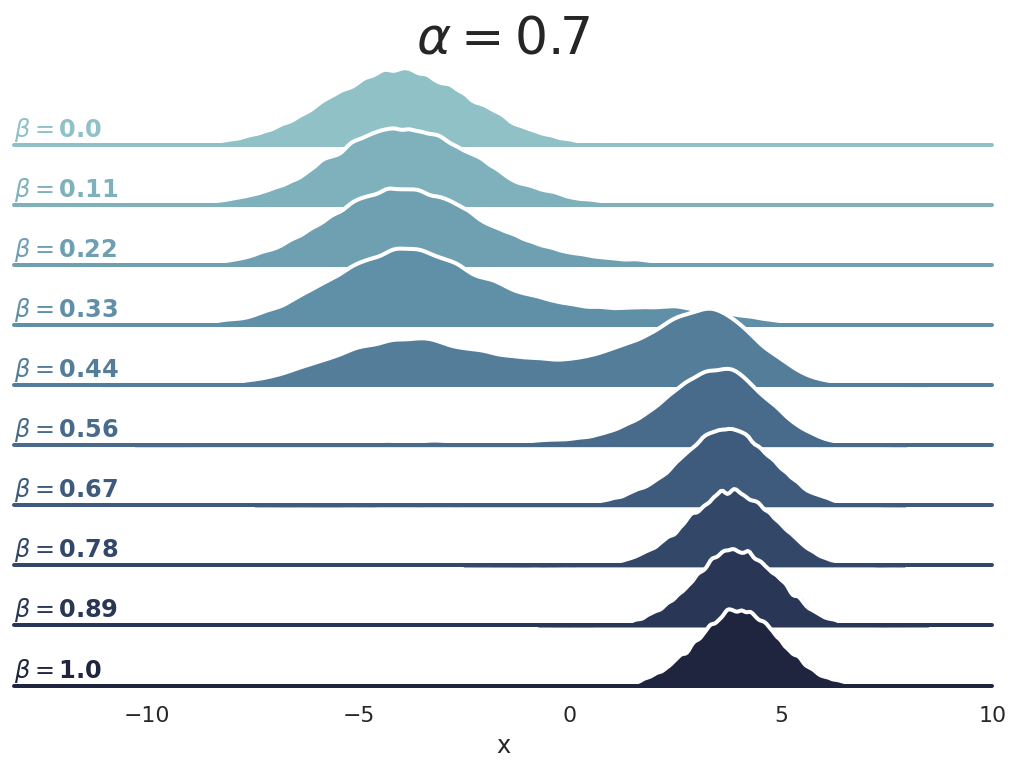

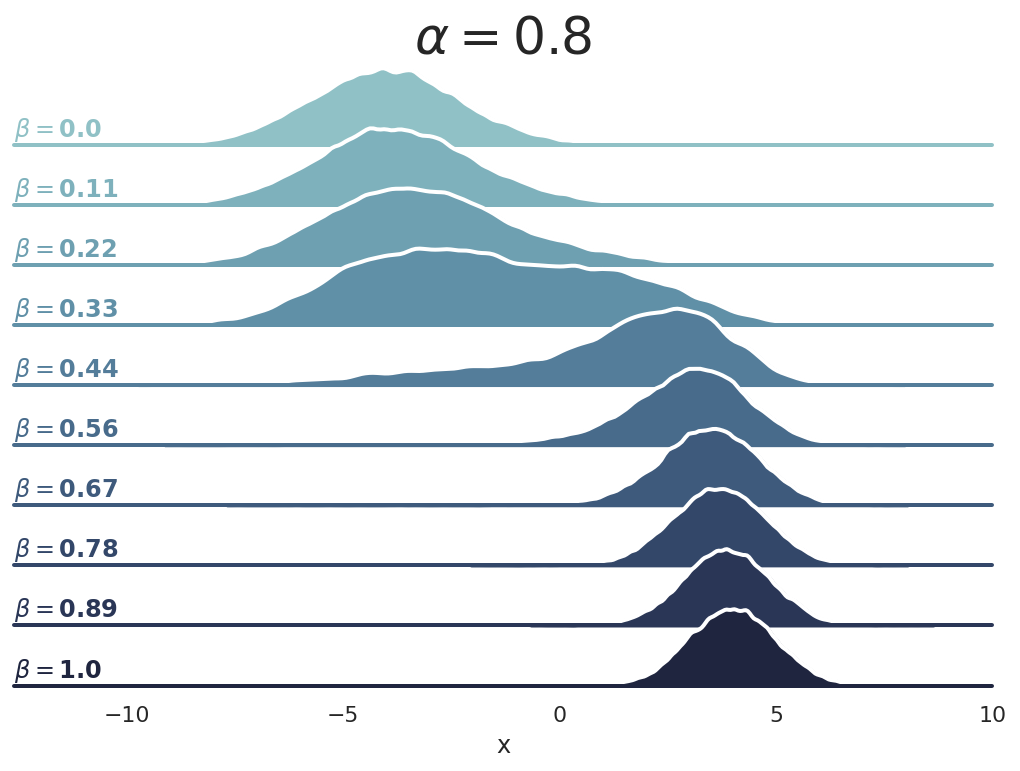

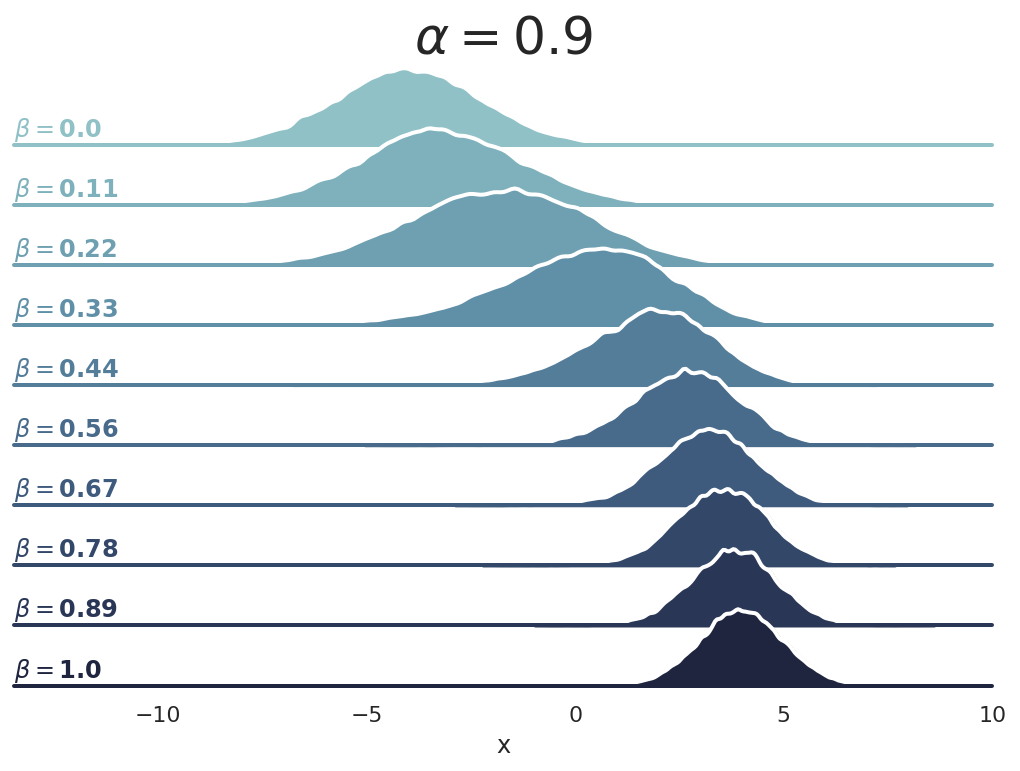

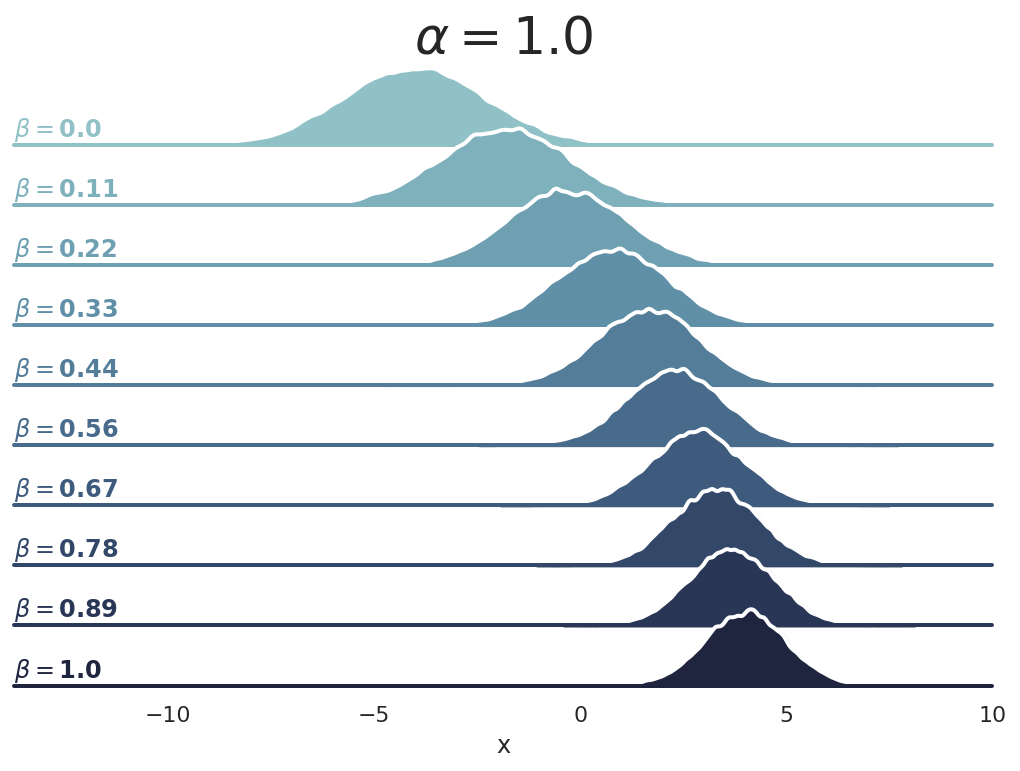

In [44]:
for a in alpha_vec:
    tmp = res[res.alpha == a]
    plot_ridge(tmp, [a])

In [66]:
hmc_res2['label'] = hmc_res2.beta.apply(lambda x: r"$\beta=${:.02}".format(x))
hmc_res2  = hmc_res2.rename_column(0,'x')

In [58]:
# (hmc_res[hmc_res.alpha == -1]
# .pivot(columns='beta', values='x')
# .hist(bins=30, figsize=(10, 6), alpha=0.6, sharex=True, sharey=True))

In [59]:
# (hmc_res[hmc_res.alpha == 0]
# .pivot(columns='beta', values='x')
# .hist(bins=30, figsize=(10, 6), alpha=0.6, sharex=True, sharey=True))

/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


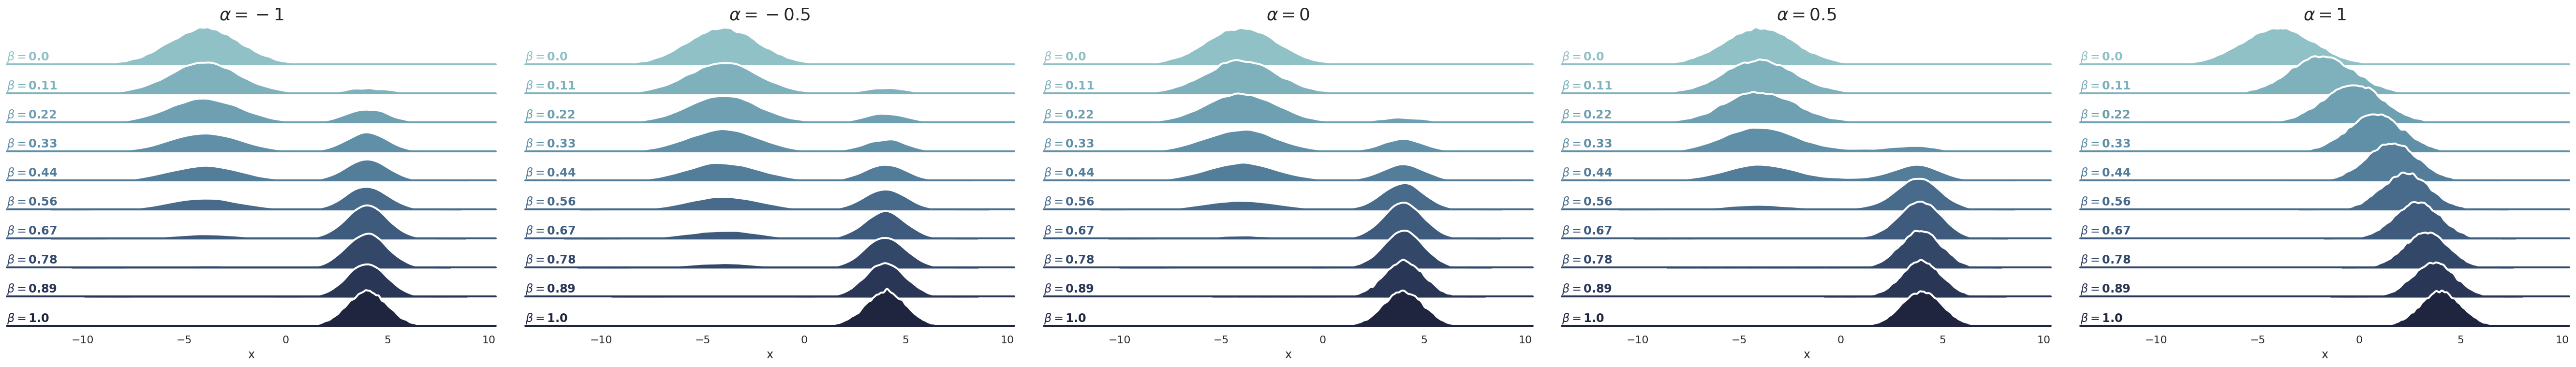

In [70]:
plot_ridge(hmc_res, alpha_vec)

/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


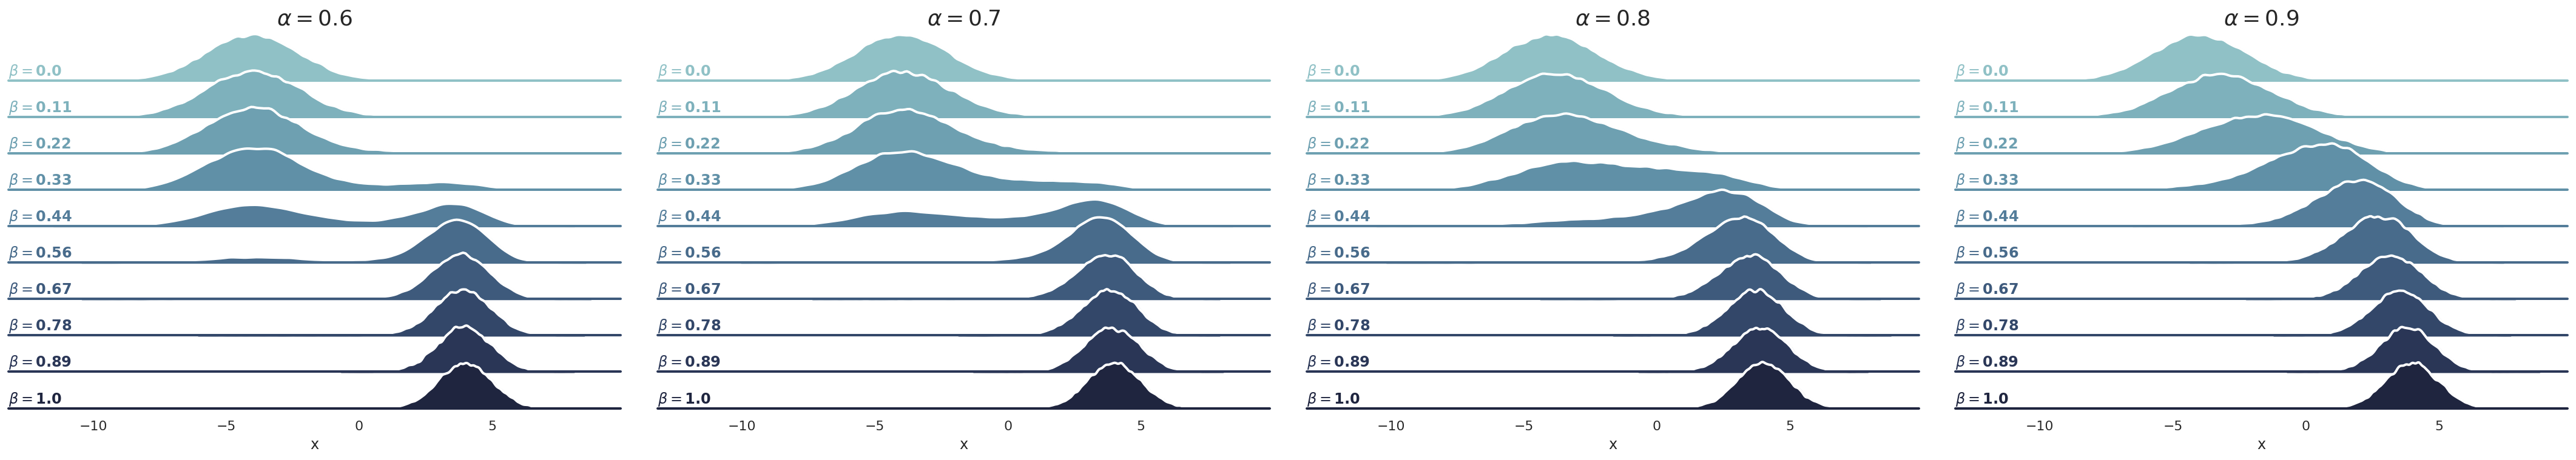

In [71]:
plot_ridge(hmc_res2, alpha_vec2)

In [76]:
av = alpha_vec + alpha_vec2
av.sort()

In [79]:
res = pd.concat([hmc_res, hmc_res2])

/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


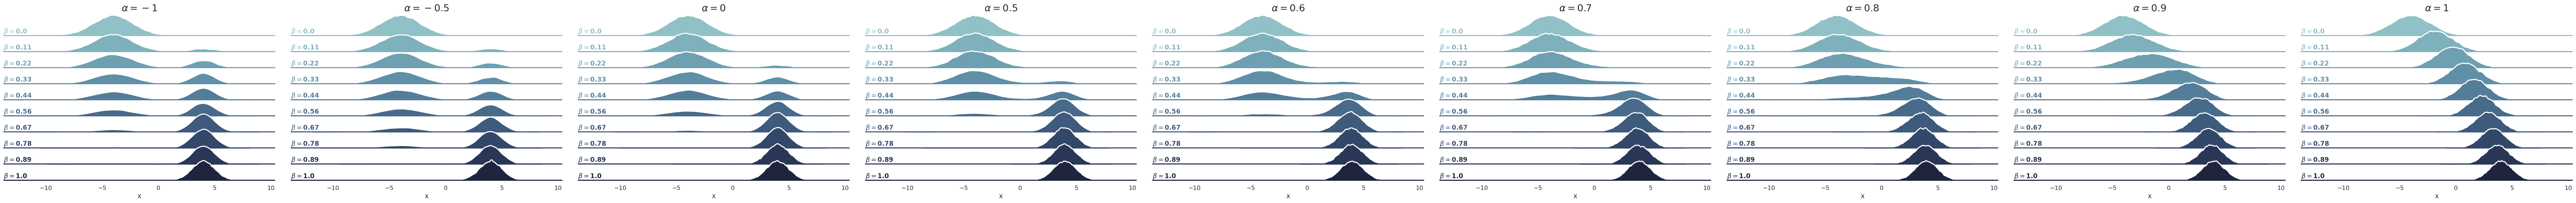

In [81]:
plot_ridge(res, av)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1648e971d0>,
      dtype=object)

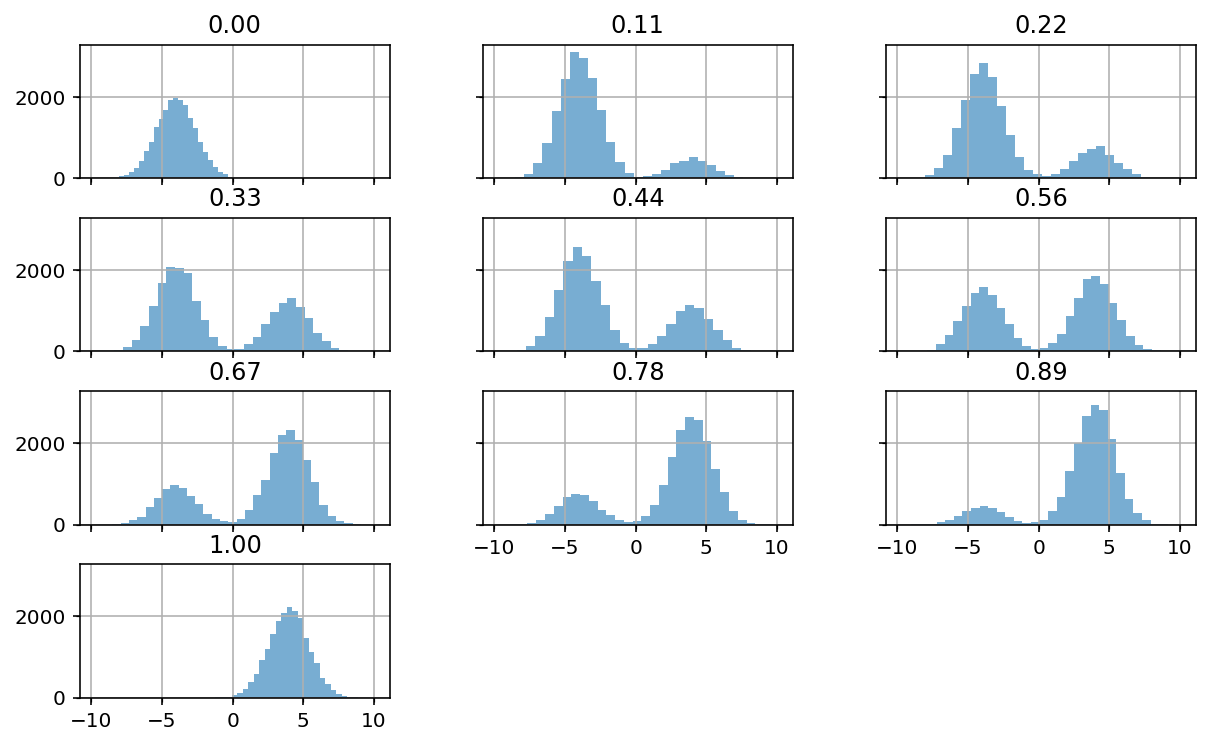

In [14]:
hmc1

In [23]:
hmc_res.to_pickle(f"/tmp/alpha_path_samples.pkl")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f393214d208>,
      dtype=object)

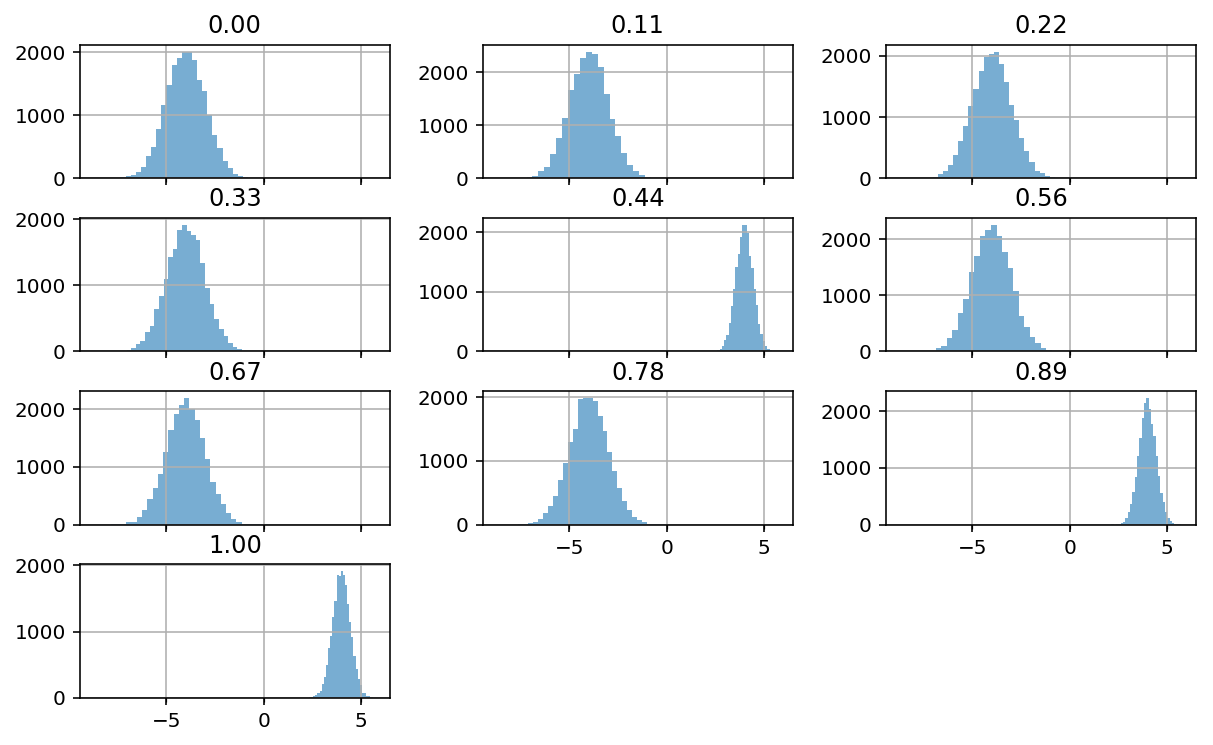

In [80]:
hmc.hist(bins=30, figsize=(10, 6), alpha=0.6, sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3913990c50>,
      dtype=object)

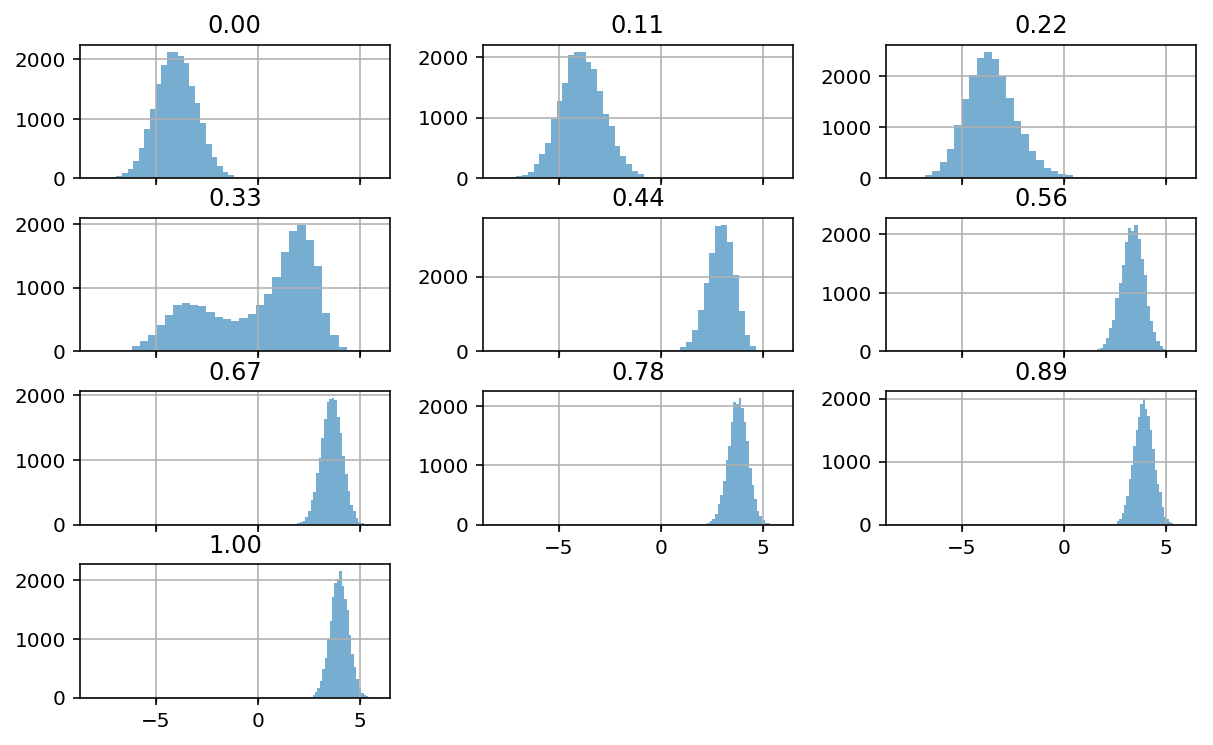

In [76]:
hmc.hist(bins=30, figsize=(10, 6), alpha=0.6, sharex=True)

In [7]:
(2/(1-alpha))

NameError: name 'alpha' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95f7809b10>,
      dtype=object)

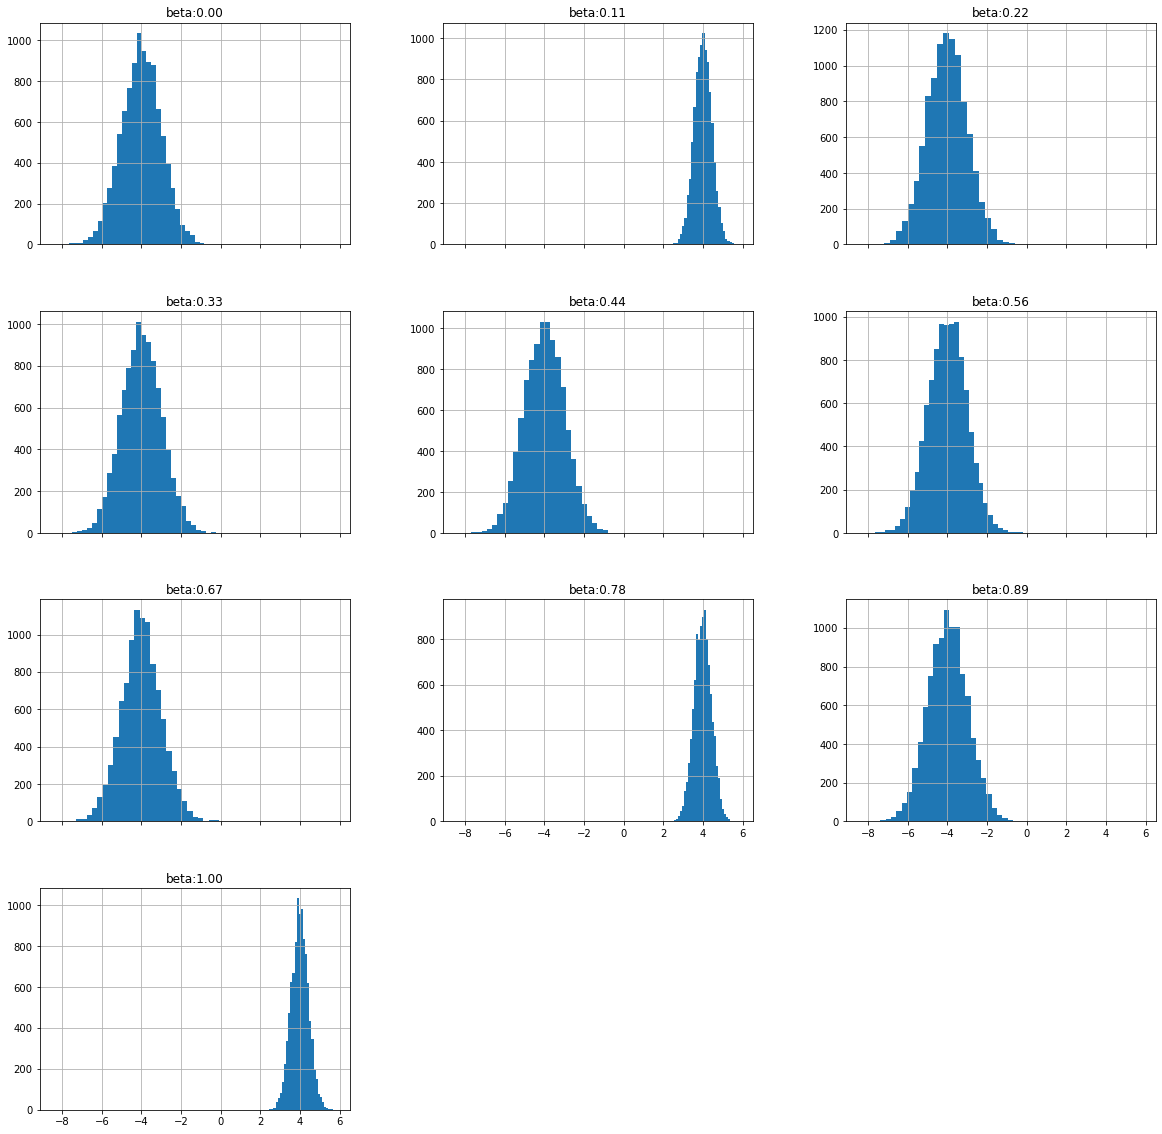

In [22]:
hmc.hist(bins=30, figsize=(20, 20), sharex=True)

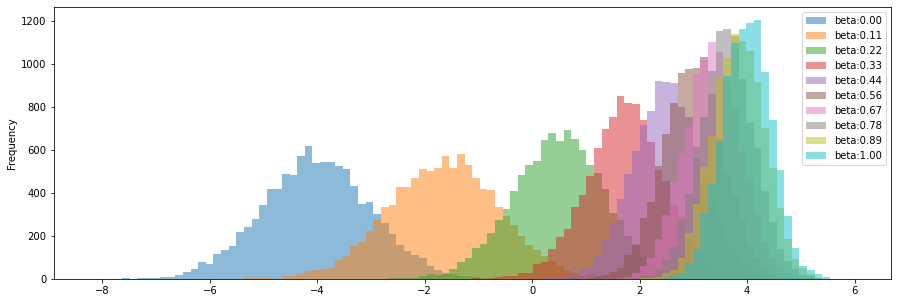

In [16]:
hmc.plot.hist(bins=100, alpha=0.5, figsize=(15, 5))

In [39]:
beta_vec = np.linspace(.99, 1.0, 25)

In [42]:
beta_vec

array([0.99      , 0.99041667, 0.99083333, 0.99125   , 0.99166667,
       0.99208333, 0.9925    , 0.99291667, 0.99333333, 0.99375   ,
       0.99416667, 0.99458333, 0.995     , 0.99541667, 0.99583333,
       0.99625   , 0.99666667, 0.99708333, 0.9975    , 0.99791667,
       0.99833333, 0.99875   , 0.99916667, 0.99958333, 1.        ])

In [1]:
# def sigmoid_schedule(num, rad=4):
#     """The sigmoid schedule defined in Section 6.2 of the paper. This is defined as:
#           gamma_t = sigma(rad * (2t/T - 1))
#           beta_t = (gamma_t - gamma_1) / (gamma_T - gamma_1),
#     where sigma is the logistic sigmoid. This schedule allocates more distributions near
#     the inverse temperature 0 and 1, since these are often the places where the distributon
#     changes the fastest.
#     """
#     if num == 1:
#         return [np.asarray(0.0),np.asarray(1.0)]
#     t = np.linspace(-rad, rad, num)
#     sigm = 1. / (1. + np.exp(-t))
#     return (sigm - sigm.min()) / (sigm.max() - sigm.min())

In [ ]:
hmc_n99.hist(bins=30, figsize=(20, 20), sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf46fdc6d0>]],
      dtype=object)

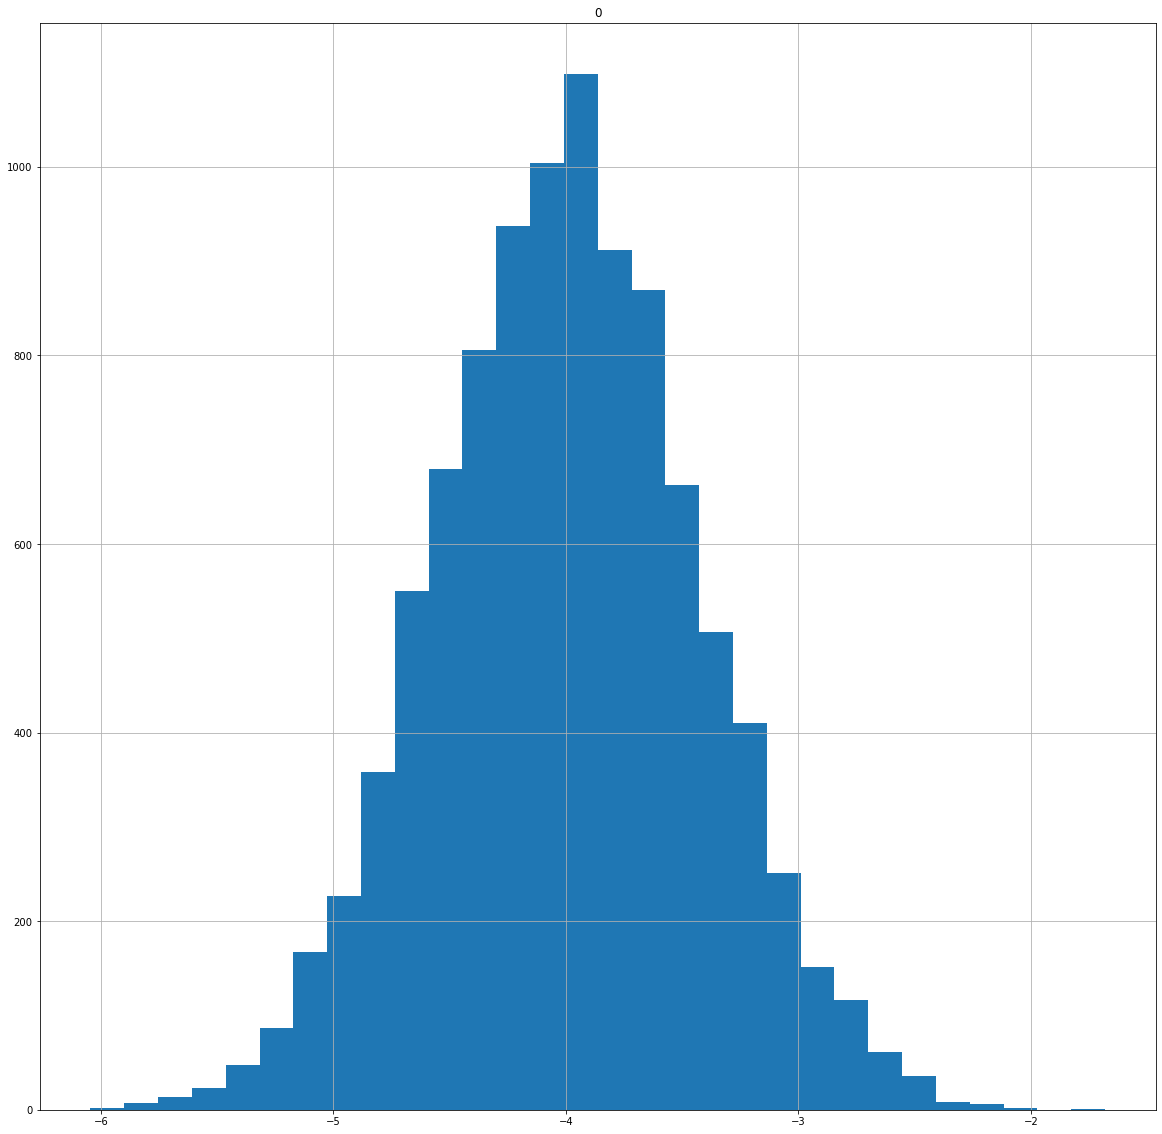

In [49]:
pd.DataFrame(tmp).hist(bins=30, figsize=(20, 20), sharex=True)

In [40]:
hmc_n99 = pmap(lambda x: alpha_average(proposal, target, x, -0.99).sample(no_samples), beta_vec, notebook=True)
hmc_n99 = pd.DataFrame({f"beta:{beta:.2f}": v for beta, v in zip(beta_vec, hmc_n99)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf47030610>,
      dtype=object)

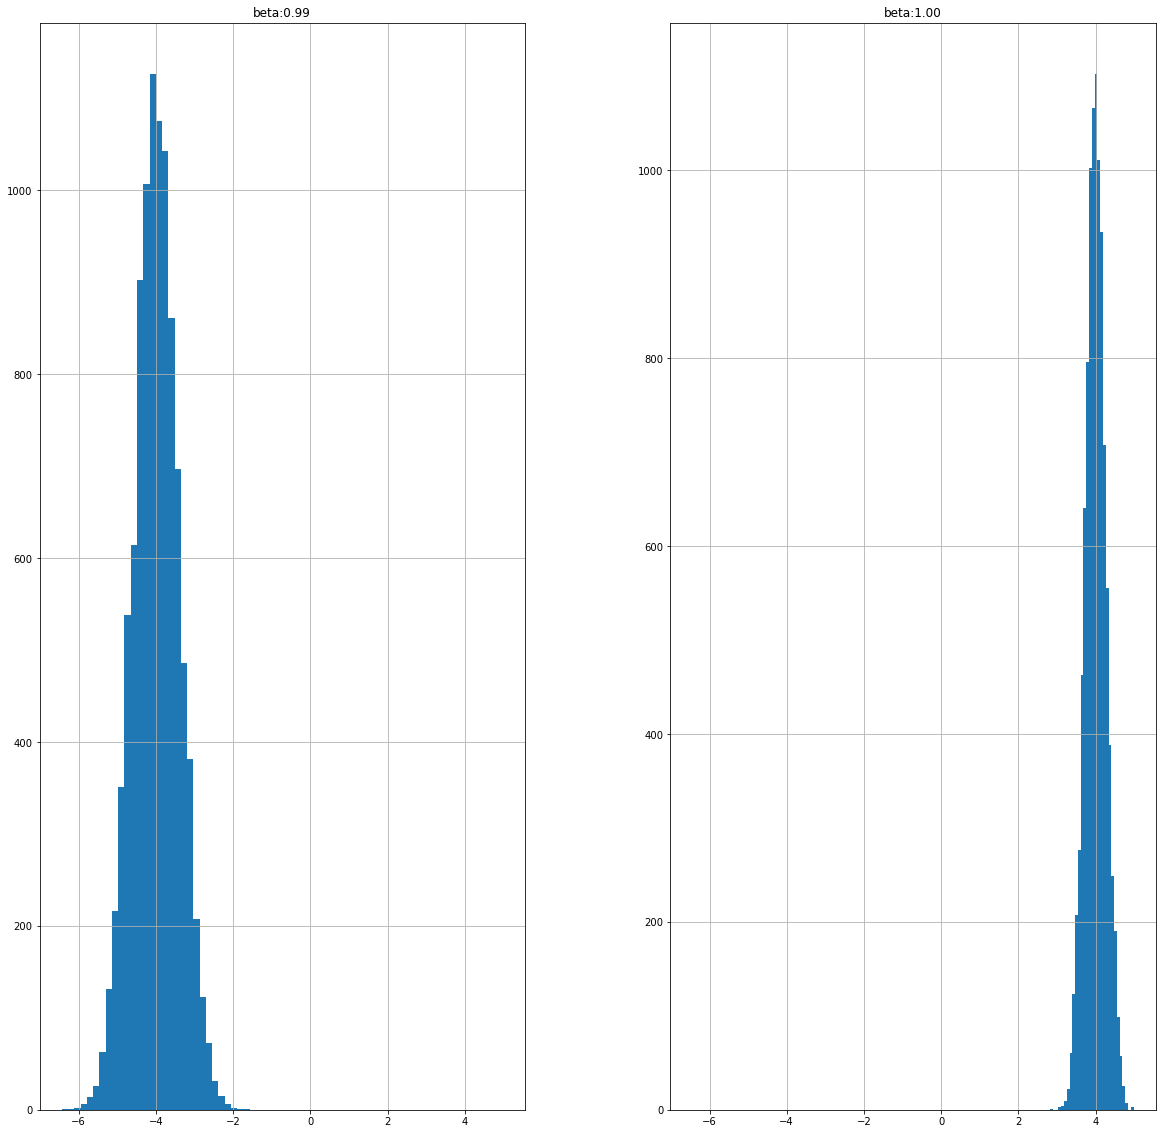

In [41]:
hmc_n99.hist(bins=30, figsize=(20, 20), sharex=True)

In [23]:
hmc_n90 = pmap(lambda x: alpha_average(proposal, target, x, -0.90).sample(no_samples), beta_vec, notebook=True)
hmc_n90 = pd.DataFrame({f"beta:{beta:.2f}": v for beta, v in zip(beta_vec, hmc_n90)})

In [13]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf3ddbb390>,
      dtype=object)

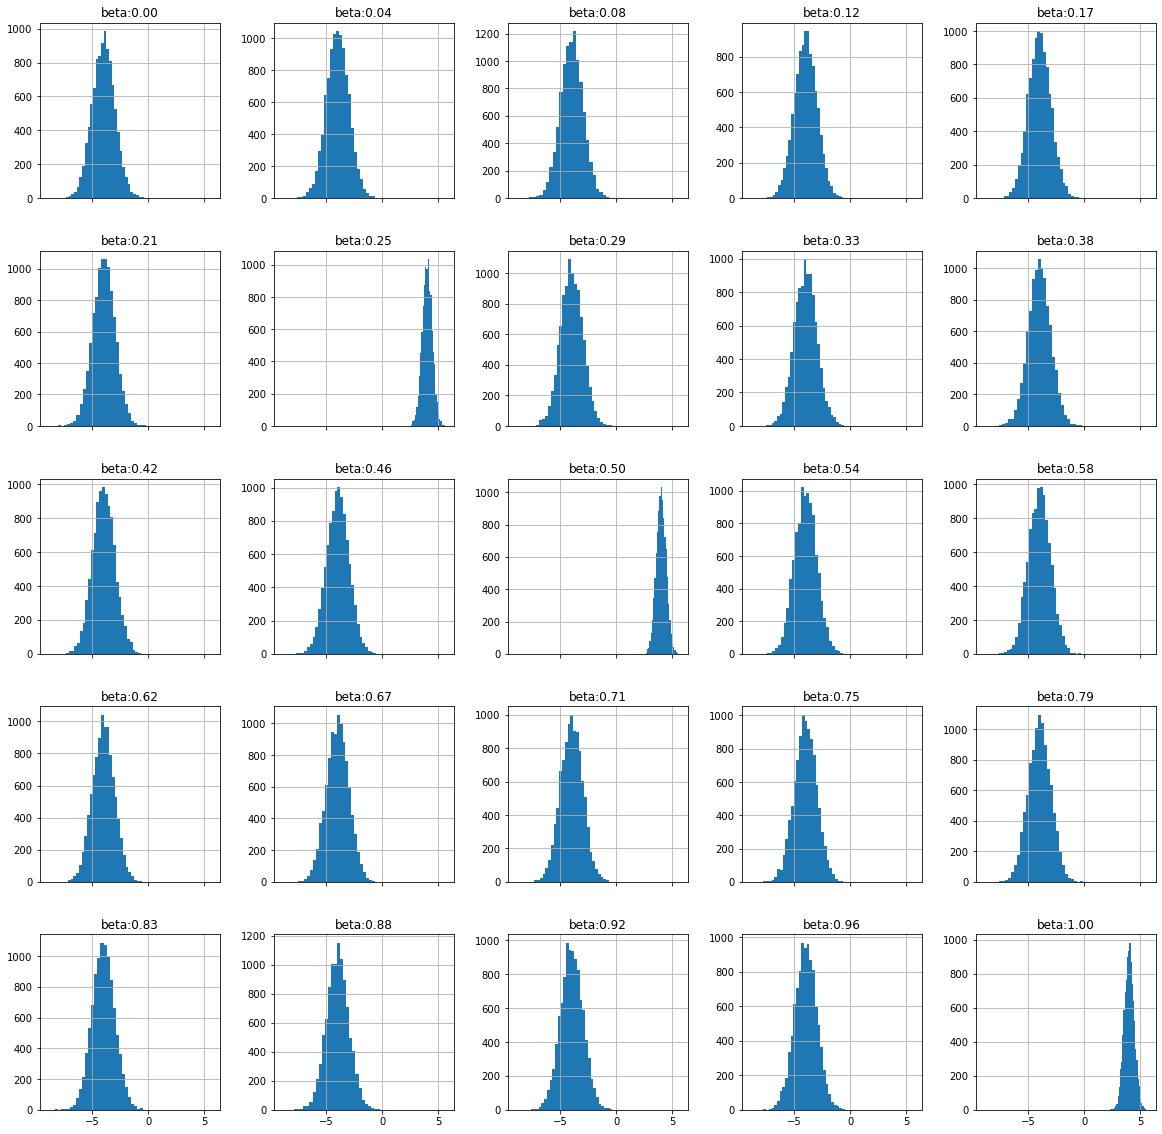

In [34]:
hmc_0.hist(bins=30, figsize=(20, 20), sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf55b98110>,
      dtype=object)

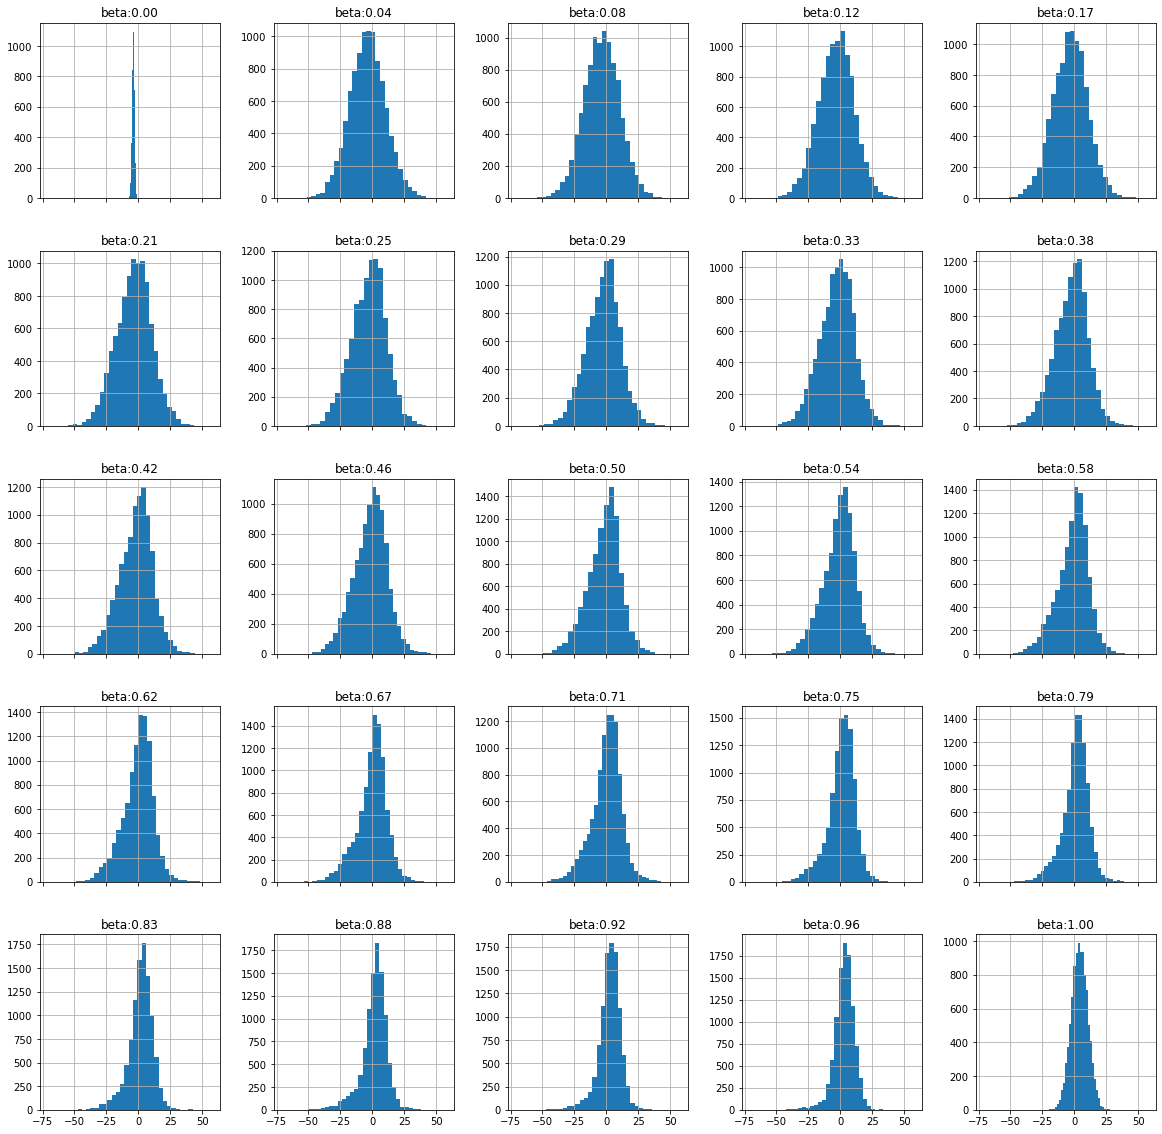

In [27]:
hmc_99.hist(bins=30, figsize=(20, 20), sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf3eb0fe50>,
      dtype=object)

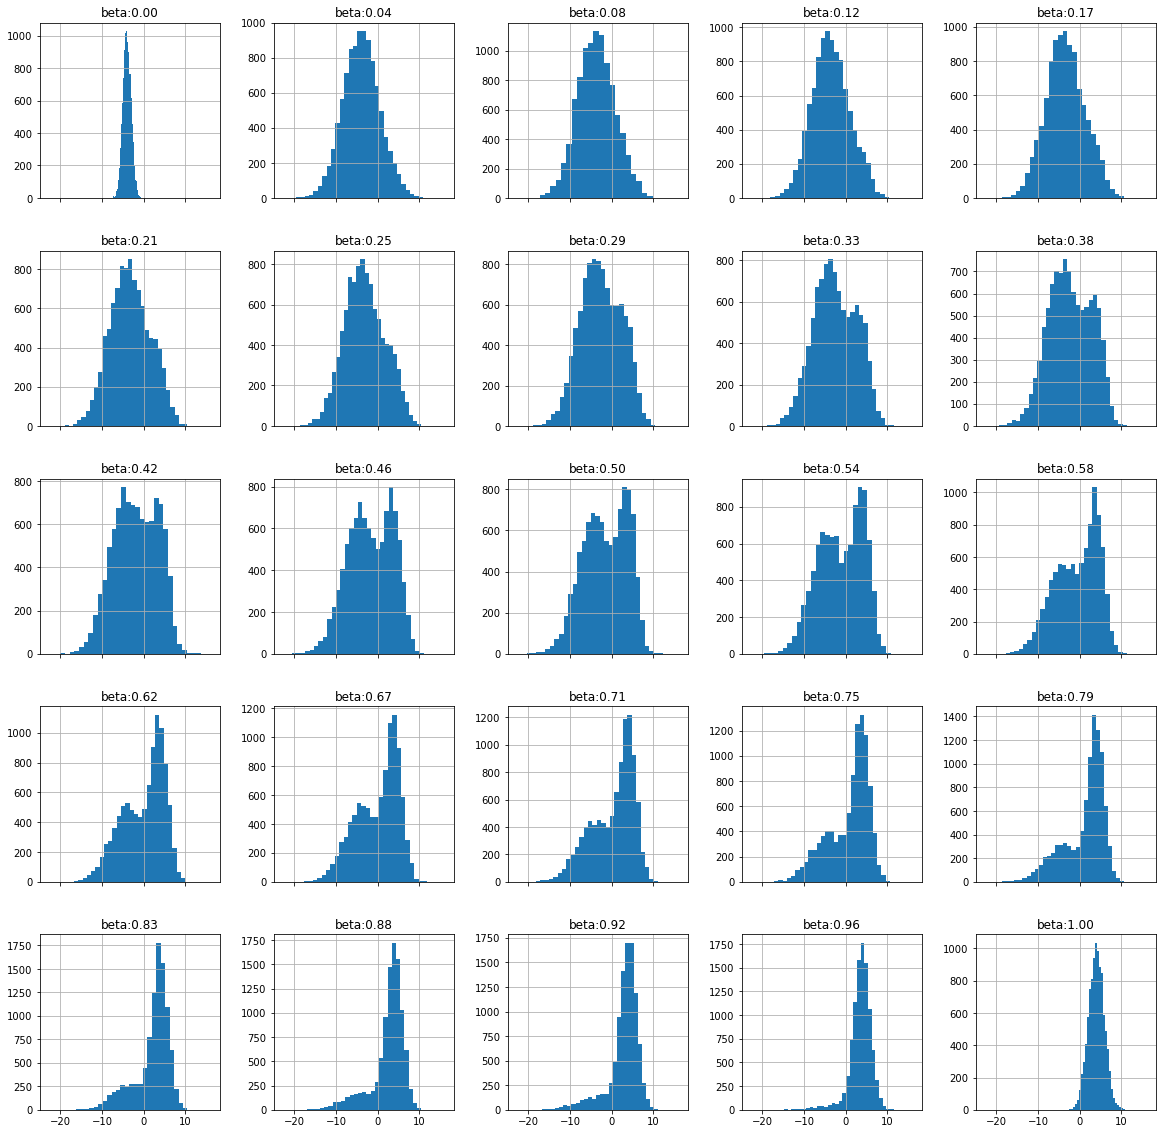

In [28]:
hmc_90.hist(bins=30, figsize=(20, 20), sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf40b0a750>,
      dtype=object)

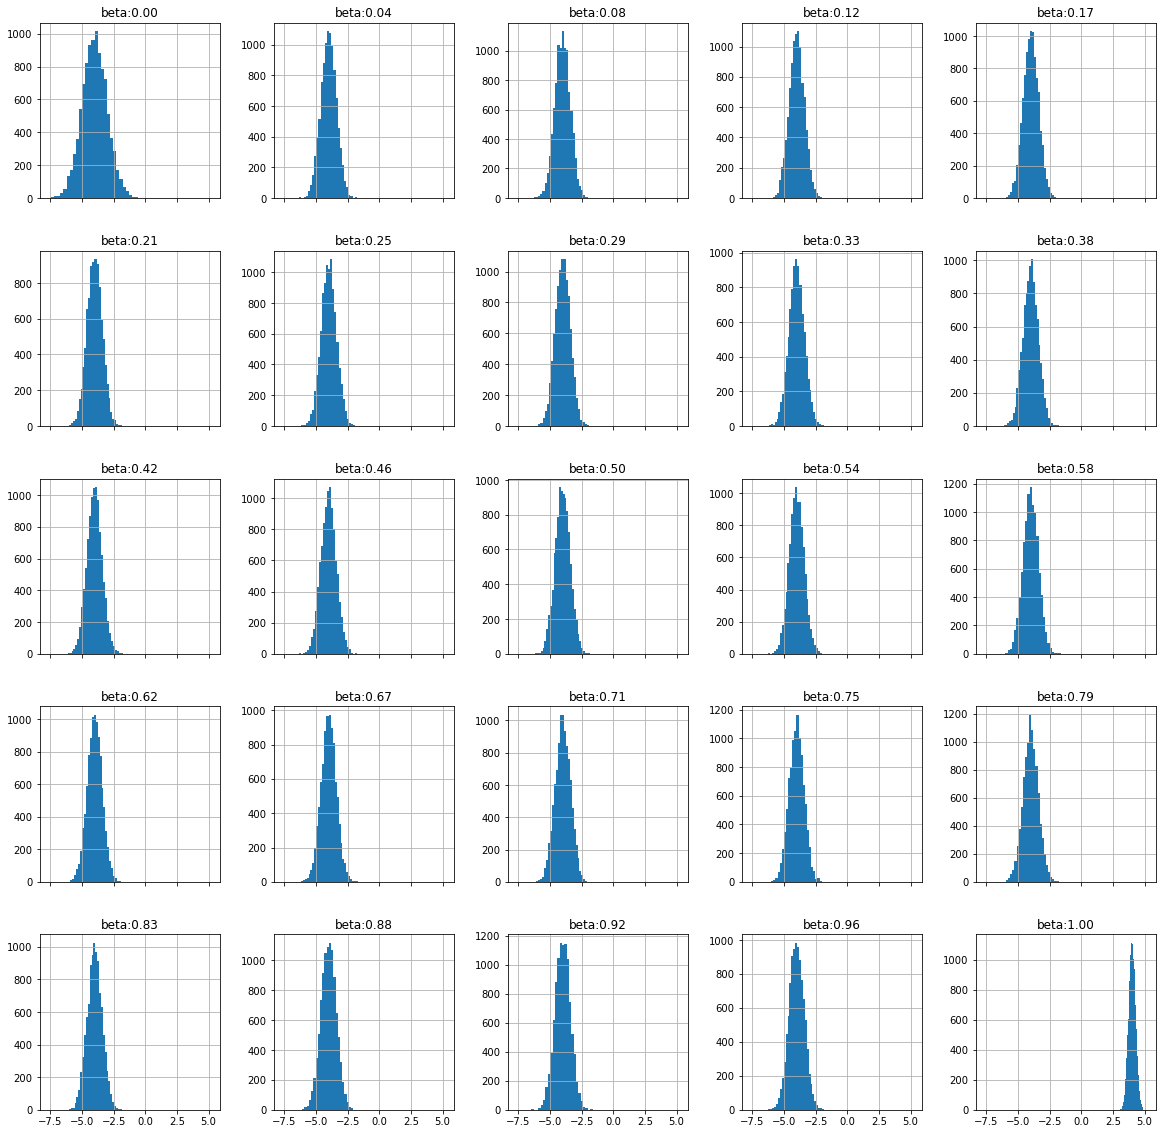

In [29]:
hmc_n90.hist(bins=30, figsize=(20, 20), sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf43c45c50>,
      dtype=object)

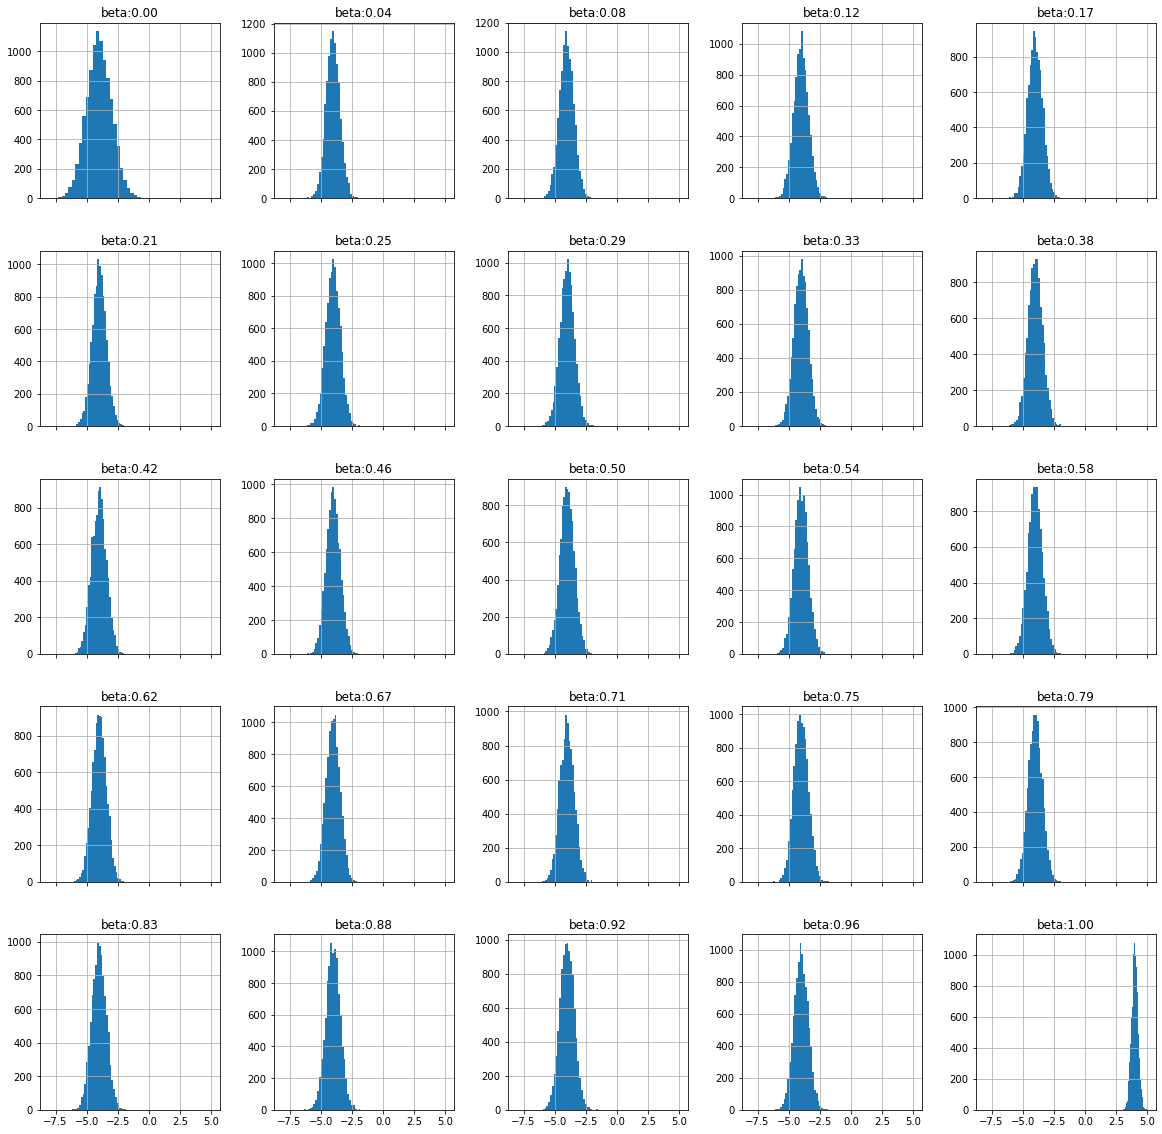

In [31]:
hmc_n99.hist(bins=30, f
             

In [ ]:
plot_dists(hmc)

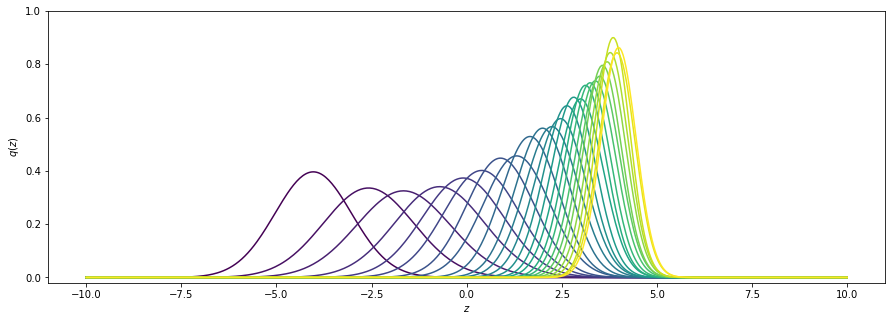

In [92]:
plot_dists(baseline)

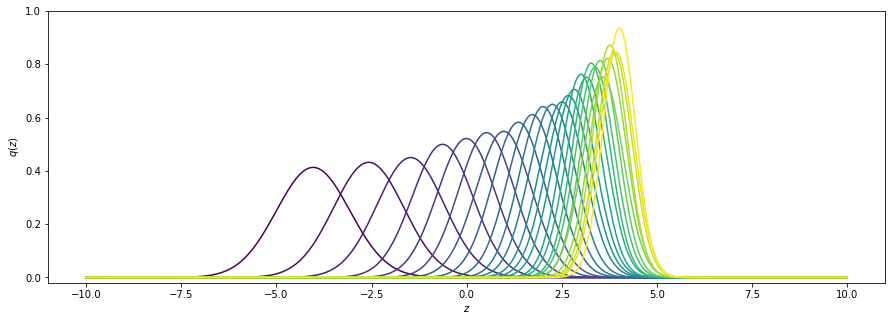

In [91]:
plot_dists(hmc)

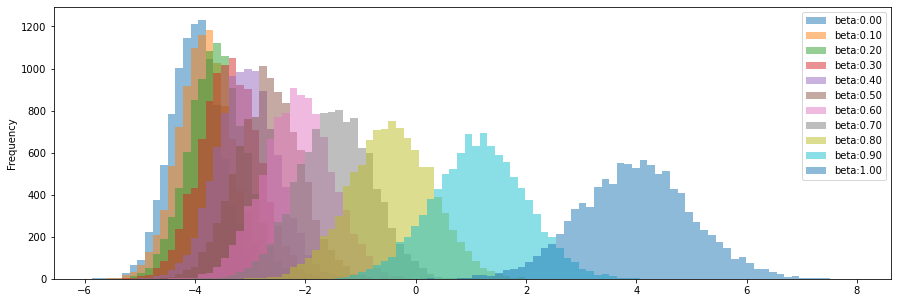

In [24]:
hmc.plot.hist(bins=100, alpha=0.5, figsize=(15, 5))

In [21]:
# sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

,beta:0.00,beta:0.10,beta:0.20,beta:0.30,beta:0.40,beta:0.50,beta:0.60,beta:0.70,beta:0.80,beta:0.90,beta:1.00
0,-4.276370,-3.962840,-3.033376,-2.989200,-2.239468,-2.328456,-1.219526,-1.652943,-0.362231,0.080347,2.840330
1,-3.647107,-4.405790,-4.382311,-3.558906,-2.239468,-2.328456,-2.331565,-1.030610,-0.362231,1.388694,3.749980
2,-3.745966,-3.267042,-3.263455,-3.558906,-1.629761,-2.328456,-2.331565,-1.103159,-0.034385,0.898727,3.964733
3,-4.152594,-3.664254,-3.793179,-2.997052,-1.995290,-2.328456,-1.885039,-2.121377,-1.225117,1.125912,3.964733
4,-3.958462,-3.993655,-3.302598,-3.685264,-3.111104,-2.328456,-2.525790,-0.814953,-1.225117,1.125912,5.258769
...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.036367,-3.835416,-3.922610,-2.881162,-2.773257,-2.433697,-3.142468,-0.647075,-1.941339,1.276580,3.647224
9996,-3.579323,-3.835416,-2.807785,-3.508860,-2.524252,-2.010453,-0.939495,-2.726459,-0.193778,2.103351,3.022128
9997,-3.754188,-4.046093,-2.807785,-3.390149,-3.382370,-3.114598,-0.845701,-2.537406,-0.831210,-0.170286,3.022128
9998,-4.511989,-3.568557,-2.807785,-3.907814,-2.583067,-2.311660,-2.295096,-0.597782,0.367183,-0.237786,3.788210


In [ ]:
baseline_samples = [s.sample(no_samples) for s in baseline]

In [12]:
hmc_samples = [s.sample(no_samples) for s in hmc]

100%|██████████| 1500/1500 [00:01<00:00, 784.04it/s]


In [ ]:
{"beta_{idx}"}

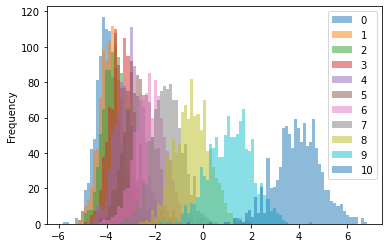

In [22]:
df.plot.hist(bins=100, alpha=0.5)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,-5.156914,-3.572364,-4.380388,-3.947205,-3.347043,-1.930223,-2.183053,-1.086215,-0.497840,0.469875,4.637562
1,-3.328577,-3.682424,-3.168999,-3.112037,-2.787426,-3.389802,-3.094803,-1.429323,-0.497840,0.469875,4.399489
2,-3.467202,-3.522927,-3.992535,-3.009656,-2.855120,-1.951176,-1.151542,-2.240825,-0.497840,1.479512,4.407518
3,-4.132007,-3.846195,-4.162697,-3.009656,-3.851904,-3.406895,-2.717752,-0.753837,-0.070705,1.891228,4.695398
4,-4.413877,-3.642538,-2.977473,-3.684487,-3.981016,-3.406895,-1.395959,-0.400759,-0.070705,0.962465,3.406001
...,...,...,...,...,...,...,...,...,...,...,...
995,-3.958549,-3.861643,-3.853089,-3.345280,-2.792966,-3.550750,-2.016593,-1.355471,-1.259943,1.076254,4.967547
996,-4.518189,-4.021938,-3.425687,-3.401925,-2.792966,-3.166850,-2.159032,-1.355471,0.090220,1.234221,4.044719
997,-3.633332,-4.021938,-3.187593,-2.983133,-3.300853,-2.489136,-2.159032,-1.596588,-0.327247,1.234221,2.647593
998,-4.075857,-4.125786,-3.621532,-3.844858,-2.956568,-2.692379,-2.159032,-1.596588,-1.000915,2.356244,4.851569


In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

In [ ]:
res = pmap(lambda x:run_ais([alpha_average(proposal, target, beta, x) for beta in beta_vec], no_samples),
             amari_alpha_vec)


In [18]:
samples = [d.sample(no_samples) for d in dists]

100%|██████████| 1500/1500 [00:01<00:00, 835.13it/s]


In [20]:
samples = [s.flatten() for s in samples]

In [8]:
baseline_samples = [d.sample(no_samples) for d in baseline_dists]

In [14]:
samples[1].flatten()

array([-4.39477269, -3.69216956, -2.96308383, -4.52295689, -3.77503378,
       -3.95519094, -3.94147726, -3.94670798, -3.94670798, -3.34782233,
       -3.95411192, -4.25043574, -3.34000612, -3.61516186, -4.39468234,
       -3.50657211, -4.00704213, -4.00704213, -3.76027966, -3.76027966,
       -3.76027966, -4.31346113, -3.67381187, -3.79964232, -3.85198667,
       -3.85198667, -3.85198667, -3.12933796, -4.1865092 , -3.23675432,
       -4.33022826, -3.33328786, -4.22052057, -4.01876539, -4.41143841,
       -4.41143841, -4.54254734, -3.85534166, -3.66429472, -4.10648916,
       -3.66886114, -3.55324759, -3.71130189, -3.45164985, -3.45164985,
       -3.25930542, -4.40541849, -3.41263477, -3.78051027, -3.55401753,
       -3.85979975, -4.61855432, -3.54464286, -4.49703803, -3.639473  ,
       -4.44992078, -3.25994802, -3.25994802, -4.86512962, -2.78596524,
       -4.78809255, -3.37675144, -4.61733909, -3.46791545, -3.88694453,
       -3.09445679, -3.51936821, -4.02545274, -3.8975303 , -3.89